In [1]:
from __future__ import print_function, division
import os
import argparse
import copy
import numpy as np
from sklearn import preprocessing
import scipy.io as sio
import netrd
import networkx as nx

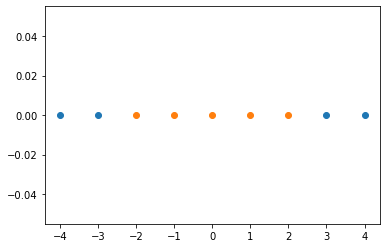

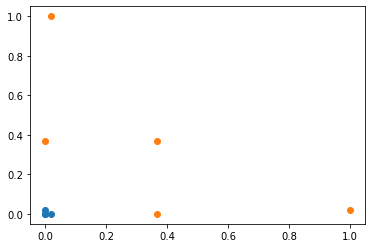

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-4, 5, 1)
y = np.array((x >= -2) & (x <= 2), dtype='int')

plt.scatter(x[y==0], [0]*len(x[y==0]))
plt.scatter(x[y==1], [0]*len(x[y==1]))
plt.show()
def gaussian(x, l):
    # 此处直接将超参数 γ 设定为 1.0；
    # 此处 x 表示一维的样本，也就是一个具体的值，l 相应的也是一个具体的数，因为 l 和 x 一样，从特征空间中选定；
    gamma = 1.0
    # 此处因为 x 和 l 都只是一个数，不需要再计算模，可以直接平方；
    return np.exp(-gamma * (x-l)**2)

# 设定地标 l1、l2 为 -1和1
l1, l2 = -1, 1
x_new = np.empty((len(x), 2))

for i, data in enumerate(x):
    x_new[i, 0] = gaussian(data, l1)
    x_new[i, 1] = gaussian(data, l2)

plt.scatter(x_new[y==0, 0], x_new[y==0, 1])
plt.scatter(x_new[y==1, 0], x_new[y==1, 1])
plt.show()

In [15]:
np.exp(-4)

0.01831563888873418

In [17]:
 x_new

array([[1.23409804e-04, 1.38879439e-11],
       [1.83156389e-02, 1.12535175e-07],
       [3.67879441e-01, 1.23409804e-04],
       [1.00000000e+00, 1.83156389e-02],
       [3.67879441e-01, 3.67879441e-01],
       [1.83156389e-02, 1.00000000e+00],
       [1.23409804e-04, 3.67879441e-01],
       [1.12535175e-07, 1.83156389e-02],
       [1.38879439e-11, 1.23409804e-04]])

In [2]:
"""
kuramoto.py
-----------
Kuramoto model of oscillators.

author: Harrison Hartle
"""

import networkx as nx
import numpy as np
import scipy.integrate as it


class Kuramoto():
    """Kuramoto model of oscillators."""

    def simulate(self, G, L, dt=0.01, strength=1, phases=None, freqs=None):
        r"""Simulate Kuramoto model on a ground truth network.

        Kuramoto oscillators model synchronization processes. At each time
        step, each node adjusts its phase :math:`\theta_i` according to the
        equation

        .. math::
            \theta_i = \omega_i + \frac{\lambda}{N}\sum_{j=1}^{N}\sin\left(\theta_j - \theta_i\right),


        where :math:`\lambda`, is a coupling `strength` parameter and each node
        has an internal frequency :math:`\omega_i`; the `freqs` function
        parameter provides the option to initialize these frequencies with
        user-defined values (or leave as `None` to randomly initialize). Each
        node's initial phase :math:`\theta_{i0}` can be randomly initialized
        (the default behavior) or set by specifying the `phases` parameter.

        The results dictionary also stores the ground truth network as
        `'ground_truth'` and the internal frequencies of the process as
        `'internal_frequencies'`.

        For more information on the Kuramoto model, see the review essay
        included below.

        Parameters
        ----------

        G (nx.Graph)
            the input (ground-truth) graph with :math:`N` nodes.

        L (int)
            the length of the desired time series.

        dt (float)
            size of timestep for numerical integration.

        strength (float)
            coupling strength (prefactor for interaction terms).

        phases (np.ndarray)
            an :math:`N \times 1` array of initial phases.

        freqs (np.ndarray)
            an :math:`N \times 1` array of internal frequencies.

        Returns
        -------

        TS (np.ndarray)
            an :math:`N \times L` array of synthetic time series data.

        Examples
        --------

        .. code:: python

            G = nx.ring_of_cliques(4,16)
            N = G.number_of_nodes()
            L = int(1e4)
            omega = np.random.uniform(0.95, 1.05, N)
            dynamics = Kuramoto()
            TS = dynamics.simulate(G, L, dt=0.01, strength=0.3, freqs=omega)

        References
        ----------
        .. [1] F. Rodrigues, T. Peron, P. Ji, J. Kurths.
               The Kuramoto model in complex networks.
               https://arxiv.org/abs/1511.07139

        """
        A = nx.to_numpy_array(G)
        N = G.number_of_nodes()

        try:
            if phases is not None:
                assert len(phases) == N
                theta_0 = phases
            else:
                theta_0 = 2 * np.pi * np.random.rand(N)

            if freqs is not None:
                assert len(freqs) == N
                omega = freqs
            else:
                omega = np.random.uniform(0.9, 1.1, N)

        except AssertionError:
            raise ValueError("Initial conditions must be None or lists of length N.")

        t = np.linspace(dt, L * dt, L)  # time-vector
        one = np.ones(N)  # define a rate of change function

        def ddt_theta(theta, t, g, strength, A):
            prefactor = strength / N
            first = np.outer(one, theta)
            second = np.outer(theta, one)

            return g + prefactor * (A * np.sin(first - second)).dot(one)

        # integrate the equations of motion numerically
        args = (omega, strength, A)
        TS_T = it.odeint(ddt_theta, theta_0, t, args=args)
        TS = TS_T
        # odeint returns LxN result
        # transposing yields reversed-order nodes => apply flipud.
        # TS = np.flipud(TS_T.T)

        # # adjust phases
        # TS = TS % (2 * np.pi)

        return TS


[(0, 1), (0, 2), (0, 3), (0, 4), (3, 4), (4, 3)]


NameError: name 'Kuramoto' is not defined

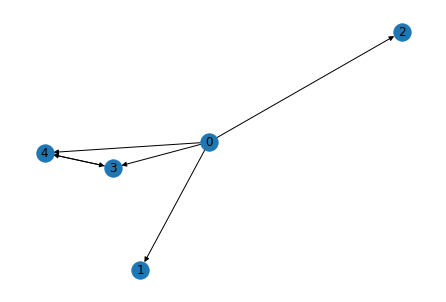

In [35]:
import networkx as nx
import math
G = nx.DiGraph() # new graph

H=nx.path_graph(5) # add 10 new nodes
G.add_nodes_from(H)
# print(G.nodes()) # print nodes

G.add_edges_from([(0,1),(0,2),(0,3),(0,4),(4,3),(3,4)]) # add new adges
print(G.edges()) # print edges
nx.draw(G,with_labels=True)
N =5
L = int(250)
omega = np.random.uniform(0, 2, N)
theta0 = np.random.uniform(0, 2*np.pi, N)

dynamics = Kuramoto()
TS = dynamics.simulate(G, L, dt=0.1, strength=1, freqs=omega,phases=theta0)
TS = TS.T
import matplotlib.pyplot as plt
plt.plot(TS[0,:2000],label='0')
plt.plot(TS[1,:2000],label='1')
plt.plot(TS[2,:2000],label='2')
plt.plot(TS[3,:2000],label='3')
plt.plot(TS[4,:2000],label='4')
plt.legend()

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from tqdm import tqdm

from kuramoto import Kuramoto, plot_phase_coherence, plot_activity

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.6)

In [37]:


# Instantiate a random graph and transform into an adjacency matrix
graph_nx = nx.erdos_renyi_graph(n=5, p=0.5) # p=1 -> all-to-all connectivity
graph = nx.to_numpy_array(graph_nx)



In [38]:
# Instantiate model with parameters
data = []
for i in range (100):
    
    model = Kuramoto(coupling=100, dt=0.1, T=10, n_nodes=len(graph))
    act_mat = model.run(adj_mat=graph)
    data.append(act_mat[:,:200])
data = np.array(data)
data.shape
# Run simulation - output is time series for all nodes (node vs time)


(100, 5, 100)

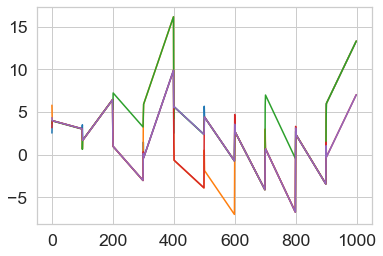

In [41]:
plt.plot(y_new[:,:1000].T)

In [40]:
y_new=np.hstack(data[i,:,:] for i in range(100))
y_new.shape

C:\Users\DELL\AppData\Local\Temp\ipykernel_20932\490916550.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  y_new=np.hstack(data[i,:,:] for i in range(100))


(5, 10000)

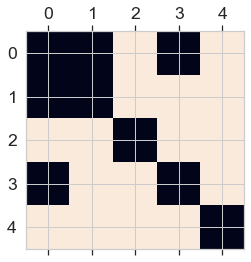

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.matshow(graph)


In [111]:
graph=[[0,1,1,1,0],[1,1,1,1,0],[1,1,0,0,0],[1,1,0,0,1],[0,0,0,1,0]]
graph=np.array(graph)

<AxesSubplot:xlabel='Time', ylabel='$\\theta$'>

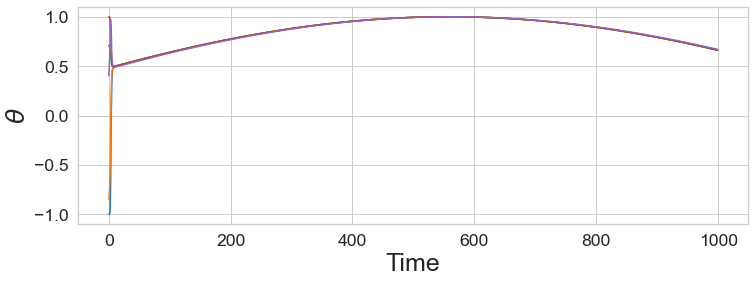

In [7]:
def plot_activity(activity):
    """
    Plot sin(angle) vs time for each oscillator time series.

    activity: 2D-np.ndarray
        Activity time series, node vs. time; ie output of Kuramoto.run()
    return:
        matplotlib axis for further customization
    """
    _, ax = plt.subplots(figsize=(12, 4))
    ax.plot(np.sin(activity.T))
    ax.set_xlabel('Time', fontsize=25)
    ax.set_ylabel(r'$\theta$', fontsize=25)
    return ax

# Plot all the time series
plot_activity(act_mat)



<AxesSubplot:xlabel='Time', ylabel='Order parameter'>

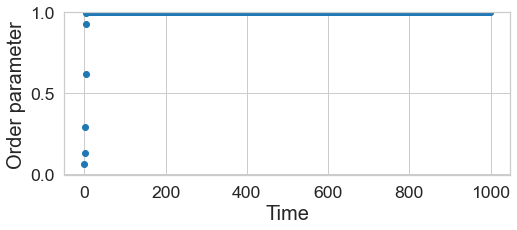

In [8]:


# Plot evolution of global order parameter R_t
plot_phase_coherence(act_mat)



In [129]:
act_mat.shape

(5, 1000)

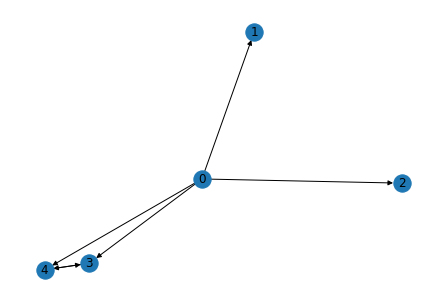

In [5]:
nx.draw(G,with_labels=True)

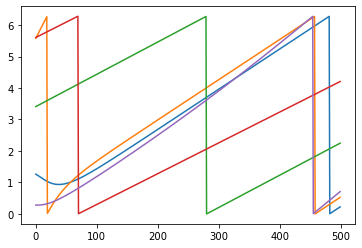

In [14]:
import matplotlib.pyplot as plt
plt.plot(TS[0,:500])
plt.plot(TS[1,:500])
plt.plot(TS[2,:500])
plt.plot(TS[3,:500])
plt.plot(TS[4,:500])

In [10]:

N =5
L = int(1e4)
omega = np.random.uniform(0.95, 1.05, N)
dynamics = netrd.dynamics.Kuramoto()
TS = dynamics.simulate(G, L, dt=0.01, strength=100, freqs=omega)

NameError: name 'G' is not defined

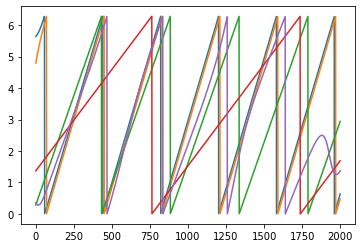

In [78]:
import matplotlib.pyplot as plt
plt.plot(TS[0,:2000])
plt.plot(TS[1,:2000])
plt.plot(TS[2,:2000])
plt.plot(TS[3,:2000])
plt.plot(TS[4,:2000])

In [24]:
y=y_new
y.shape

(5, 20000)

In [6]:
from __future__ import print_function, division
import os
import argparse
import copy
import numpy as np
from sklearn import preprocessing
import scipy.io as sio
def load_sequence_data1():
    simulation_name = 'matlab(1)' + '.mat'
    # simulation_name = 'realization_' + 'linear' + '_' + '4096' + '.mat'
    simulation_dir = 'simulation_difflen'
    simulation_name = os.path.join(simulation_dir, simulation_name)
    simulation_data = sio.loadmat(simulation_name)#5,4096
    simulation_data = np.array(simulation_data["X1"])
    return simulation_data
y=load_sequence_data1()
y.shape

(100, 6)

In [7]:
y=y[:50]
y.shape

(50, 6)

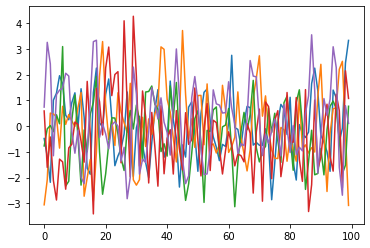

In [4]:
import matplotlib.pyplot as plt
plt.plot(y[:100])

In [47]:
y_new=np.hstack(y[:,:50,i] for i in range(100))

C:\Users\DELL\AppData\Local\Temp\ipykernel_14372\618075014.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  y_new=np.hstack(y[:,:50,i] for i in range(100))


In [48]:
y_new.shape

(5, 5000)

In [28]:
G = recon.results['graph']

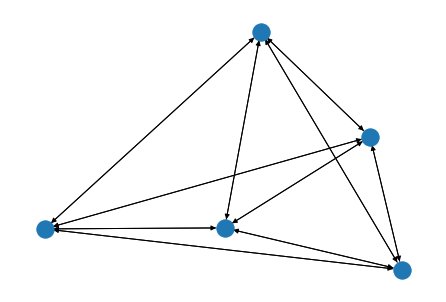

In [29]:
import networkx as nx
nx.draw(G)

In [27]:
recon=netrd.reconstruction.GrangerCausality()
g=recon.fit(y11)

d:\Anaconda\lib\site-packages\netrd\utilities\threshold.py:40: RuntimeWarning: Setting 'cutoffs' argument is strongly encouraged. Using cutoff range of (-1, 1).
  warnings.warn(


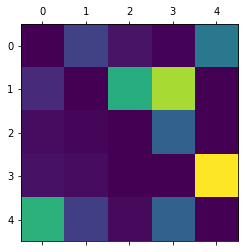

In [34]:
Z = nx.to_numpy_array(g)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.matshow(Z)


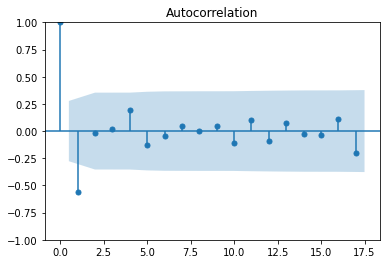

In [14]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y11[4,:50])
pyplot.show()

In [13]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
import matplotlib.pyplot as plt
y11=[]
for j in range(y.shape[0]):
    diff=difference(y[j])
    y11.append(diff)
y11=np.array(y11)
y11.shape

(5, 249)

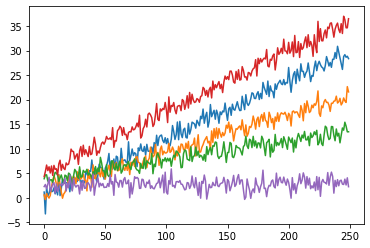

In [4]:
import matplotlib.pyplot as plt
plt.plot(y[0])
plt.plot(y[1])
plt.plot(y[2])
plt.plot(y[3])
plt.plot(y[4])

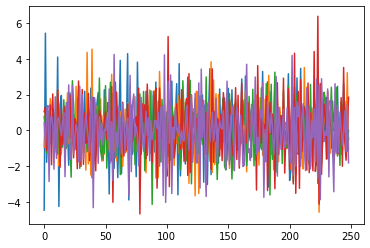

In [15]:
import matplotlib.pyplot as plt
plt.plot(y11[0])
plt.plot(y11[1])
plt.plot(y11[2])
plt.plot(y11[3])
plt.plot(y11[4])

In [78]:
"""
granger_causality.py
--------------

Graph reconstruction algorithm based on [1].

[1] P. Desrosiers, S. Labrecque, M. Tremblay, M. Bélanger, B. De Dorlodot,
D. C. Côté, "Network inference from functional experimental data", Proc. SPIE
9690, Clinical and Translational Neurophotonics; Neural Imaging and Sensing;
and Optogenetics and Optical Manipulation, 969019 (2016);

author: Charles Murphy
email: charles.murphy.1@ulaval.ca
Submitted as part of the 2019 NetSI Collabathon.
"""

import numpy as np

from sklearn.linear_model import LinearRegression


class GrangerCausality():
    """Uses the Granger causality between nodes."""

    def fit(self, TS, lag=1, threshold_type="range", **kwargs):
        """Reconstruct a network based on the Granger causality. To evaluate
        the effect of a time series :math:`j` over another, :math:`i`, it first
        evaluates the error :math:`e_1` given by an autoregressive model fit
        with :math:`i` alone. Then, it evaluates another error :math:`e_2`
        given by an autoregressive model trained to correlate the future of
        :math:`i` with the past of :math:`i` and :math:`j`. The Granger
        causality of node :math:`j` over :math:`i` is simply given by
        :math:`log(var(e_1) / var(e_2))``.

        It reconstructs the network by calculating the Granger
        causality for each pair of nodes.

        Parameters
        ----------

        TS (np.ndarray)
            Array consisting of :math:`L` observations from :math:`N`
            sensors.

        lag (int)
            Time lag to consider.

        threshold_type (str)
            Which thresholding function to use on the matrix of
            weights. See `netrd.utilities.threshold.py` for
            documentation. Pass additional arguments to the thresholder
            using ``**kwargs``.

        Returns
        --------

        G (nx.Graph)
            A reconstructed graph with :math:`N` nodes.

        """

        n = TS.shape[0]
        W = np.zeros([n, n])

        for i in range(n):
            xi, yi = GrangerCausality.split_data(TS[i, :], lag)

            for j in range(n):
                xj, yj = GrangerCausality.split_data(TS[j, :], lag)
                xij = np.concatenate([xi, xj], axis=-1)
                reg1 = LinearRegression().fit(xi, yi)
                reg2 = LinearRegression().fit(xij, yi)
                err1 = yi - reg1.predict(xi)
                err2 = yi - reg2.predict(xij)

                std_i = np.std(err1)
                std_ij = np.std(err2)

                if std_i == 0:
                    W[j, i] = -99999999
                elif std_ij == 0:
                    W[j, i] = 99999999
                else:
                    W[j, i] = np.log(std_i) - np.log(std_ij)

        # self.results["weights_matrix"] = W
        # # threshold the network
        # W_thresh = threshold(W, threshold_type, **kwargs)
        # self.results["thresholded_matrix"] = W_thresh

        # # construct the network
        # self.results["graph"] = create_graph(W_thresh)
        # G = self.results["graph"]

        return W

    @staticmethod
    def split_data(TS, lag):
        """From a single node time series, return a training dataset with
        corresponding targets.

        Parameters
        ----------

        TS (np.ndarray)
            Array consisting of :math:`L` observations from :math:`N`
            sensors.

        lag (int)
            Time lag to consider.

        Returns
        -------

        inputs (np.ndarray)
            Training data for the inputs.

        targets (np.ndarray)
            Training data for the targets.

        """
        T = len(TS)
        inputs = np.zeros([T - lag - 1, lag])
        targets = np.zeros(T - lag - 1)

        for t in range(T - lag - 1):
            inputs[t, :] = TS[t : lag + t]
            targets[t] = TS[t + lag]

        return inputs, targets


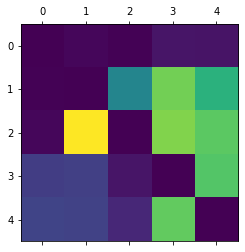

In [97]:
simulation_data = np.array(y).transpose()#4096,5
num_channel = simulation_data.shape[1]#5
scaler = preprocessing.StandardScaler().fit(simulation_data)
# scaler = preprocessing.Normalizer().fit(simulation_data)
simulation_data = scaler.transform(simulation_data)
min_max_scaler = preprocessing.MinMaxScaler()
# scale data to [0. 1]
data = min_max_scaler.fit_transform(simulation_data)#data.shape(4096,5)
gr=GrangerCausality()
W=gr.fit(data.T,5)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.matshow(W)


In [25]:
y1=y_new
y1.shape

(5, 20000)

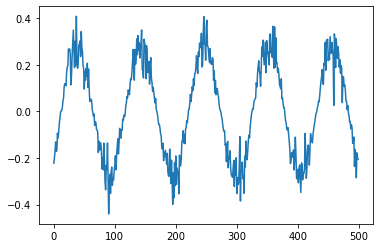

In [73]:
plt.plot(y1[0,:500])

In [8]:
y1=y
y1.shape

(50, 6)

In [8]:
# class RNN_GC(object):
#     def __init__(self, opt, num_hidden, mode):#(opt,30,linear)
#         self.sequence_length = opt.sequence_length
#         self.batch_size = opt.batch_size
#         self.num_shift = opt.num_shift
#         self.num_hidden = num_hidden
#         self.num_epoch = opt.num_epoch
#         self.theta = opt.theta
#         self.data_length = opt.data_length
#         self.weight_decay = opt.weight_decay

#         self.mode = mode

def load_sequence_data():
    simulation_name = 'realization_' + 'linear' + '_' + '4096' + '.mat'
    simulation_dir = 'simulation_difflen'
    simulation_name = os.path.join(simulation_dir, simulation_name)
    simulation_data = sio.loadmat(simulation_name)#5,4096
    simulation_data = np.array(simulation_data["data"]).transpose()#4096,5
    num_channel = simulation_data.shape[1]#5
    scaler = preprocessing.StandardScaler().fit(simulation_data)
    
    simulation_data = scaler.transform(simulation_data)
    min_max_scaler = preprocessing.MinMaxScaler()
    # scale data to [0. 1]
    data = min_max_scaler.fit_transform(simulation_data)#data.shape(4096,5)

    x, y = batch_sequence(data, num_shift=1,
                                sequence_length=20)
    return x,y
    # return data

In [10]:
def load_sequence_data():
    # simulation_name = 'realization_' + 'linear' + '_' + '4096' + '.mat'
    # simulation_dir = 'simulation_difflen'
    # simulation_name = os.path.join(simulation_dir, simulation_name)
    # simulation_data = sio.loadmat(simulation_name)#5,4096
    simulation_data = np.array(y1)#.transpose()#4096,5
    num_channel = simulation_data.shape[1]#5
    scaler = preprocessing.StandardScaler().fit(simulation_data)
    # scaler = preprocessing.Normalizer().fit(simulation_data)
    simulation_data = scaler.transform(simulation_data)
    min_max_scaler = preprocessing.MinMaxScaler()
    # scale data to [0. 1]
    data = min_max_scaler.fit_transform(simulation_data)#data.shape(4096,5)

    x, y = batch_sequence(data, num_shift=1,
                                sequence_length=1)
    return x,y


In [ ]:
def batch_sequence(x, sequence_length=1, num_shift=1):#x.shape(4096,5)
    num_points = x.shape[0]#4096
    inputs = []
    inputs1 = []
    targets = []
    for i in range(x.shape[1]):

        # for p in np.arange(0, num_points, max(num_shift, sequence_length // 5)):
        for p in np.arange(0, num_points, num_shift):
            # prepare inputs (we're sweeping from left to right in steps sequence_length long)
            if p + sequence_length + num_shift >= num_points:
                break

            inputs.append(x[p: p + sequence_length, i])
            # targets.append(x[p + sequence_length, :])
        
        inputs1.append(inputs)
        inputs = []
        targets.append(x[sequence_length:, i])
    targets = np.array(targets)
    inputs1 = np.array(inputs1)
        # idx = np.random.permutation(np.arange(inputs.shape[0]))#4085
        # inputs = inputs[idx]#4085,10,5
        # targets = targets[idx]#4085,5

    return inputs1, targets

In [9]:
def batch_sequence(x, sequence_length=5, num_shift=1):#x.shape(4096,5)
    num_points = x.shape[0]#4096
    inputs = []
    targets = []

    # for p in np.arange(0, num_points, max(num_shift, sequence_length // 5)):
    for p in np.arange(0, num_points, num_shift):
        # prepare inputs (we're sweeping from left to right in steps sequence_length long)
        if p + sequence_length  >= num_points:
            break

        inputs.append(x[p: p + sequence_length, :])
        targets.append(x[p + sequence_length, :])
    
    targets = np.array(targets)
    inputs = np.array(inputs)
    # idx = np.random.permutation(np.arange(inputs.shape[0]))#4085
    # inputs = inputs[idx]#4085,10,5
    # targets = targets[idx]#4085,5

    return inputs, targets

In [11]:
x2,y2=load_sequence_data()

In [12]:
y2.shape

(49, 6)

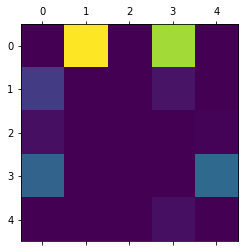

In [15]:
from statsmodels.tsa.api import VAR
import numpy as np
# for i in range(x1.shape[0]): 
var_deno=[]
# var_1=[]
granger=[]   
for i in range(x1.shape[0]):   
    model = VAR(x1[i])
    model_fit=model.fit()
    result=model_fit.forecast(model_fit.endog, steps=1)
    error=y1[i]-result
    var_deno.append(error)
var_deno=np.array(var_deno)
var_deno=np.reshape(var_deno,[100,5])
var_deno=np.var(var_deno,axis=0)
for j in range(5):
    var_=[]
    input_set=[0,1,2,3,4]
    channel_del_idx=input_set.index(j)
    tmpx=x1[:,:,input_set]
    tmpx[:,:,channel_del_idx]=0
    for i in range(x1.shape[0]):
        model = VAR(tmpx[i])
        model_fit=model.fit()
        result=model_fit.forecast(model_fit.endog, steps=1)
        error=y1[i]-result
        var_.append(error)
    var_=np.array(var_)
    var_=np.reshape(var_,[100,5])
    var_=np.var(var_,axis=0)
    granger.append(var_/var_deno)
granger=np.array(granger)
for i in range(5):
    granger[i][i]=0
granger[granger < 1]=1
granger=np.log(granger)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.matshow(granger)

In [46]:
granger

array([[0.        , 0.40498226, 0.        , 0.19455972, 0.        ],
       [0.06991988, 0.        , 0.        , 0.10610891, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.08453589, 0.        , 0.0343769 , 0.        , 0.33005743],
       [0.        , 0.        , 0.        , 0.15846058, 0.        ]])

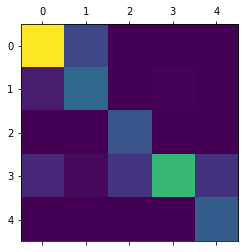

In [31]:
granger=np.array(granger)
granger[granger < 1]=1
granger=np.log(granger)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.matshow(granger)

In [14]:

from __future__ import print_function, division

import numpy as np

from keras.models import Sequential
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping
class CustomLSTM(object):
    def __init__(self, num_hidden=10, num_channel=5, weight_decay=0.0):
        if num_hidden is None:
            num_hidden = num_channel

        self.model = Sequential()

        self.model.add(LSTM(units=num_hidden, input_dim=num_channel, kernel_regularizer=l1(weight_decay),
                            recurrent_regularizer=l1(weight_decay)))#units=30,input_dim=5
        self.model.add(Dense(1))
        self.model.summary()

        rms_prop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-6)

        # adam = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
        # adagrad = Adagrad(lr=0.1, epsilon=1e-5)
        self.model.compile(loss='mean_squared_error', optimizer=rms_prop)

    def fit(self, x, y, batch_size=10, epochs=100):#x:4085*10*1  y:4085*1
        early_stopping = EarlyStopping(monitor='val_loss', patience=5)
        hist = self.model.fit(x, y,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=2,
                              validation_split=0.2,
                              callbacks=[early_stopping])
        return hist

    def predict(self, x):
        return self.model.predict(x)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                4320      
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 4,351
Trainable params: 4,351
Non-trainable params: 0
_________________________________________________________________


e:\111\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/100
13/13 - 4s - loss: 0.1056 - val_loss: 0.0269 - 4s/epoch - 296ms/step
Epoch 2/100
13/13 - 0s - loss: 0.0240 - val_loss: 0.0276 - 185ms/epoch - 14ms/step
Epoch 3/100
13/13 - 0s - loss: 0.0237 - val_loss: 0.0240 - 239ms/epoch - 18ms/step
Epoch 4/100
13/13 - 0s - loss: 0.0211 - val_loss: 0.0254 - 189ms/epoch - 15ms/step
Epoch 5/100
13/13 - 0s - loss: 0.0207 - val_loss: 0.0240 - 172ms/epoch - 13ms/step
Epoch 6/100
13/13 - 0s - loss: 0.0194 - val_loss: 0.0216 - 223ms/epoch - 17ms/step
Epoch 7/100
13/13 - 0s - loss: 0.0175 - val_loss: 0.0177 - 180ms/epoch - 14ms/step
Epoch 8/100
13/13 - 0s - loss: 0.0151 - val_loss: 0.0144 - 180ms/epoch - 14ms/step
Epoch 9/100
13/13 - 0s - loss: 0.0143 - val_loss: 0.0145 - 143ms/epoch - 11ms/step
Epoch 10/100
13/13 - 0s - loss: 0.0137 - val_loss: 0.0172 - 192ms/epoch - 15ms/step
Epoch 11/100
13/13 - 0s - loss: 0.0121 - val_loss: 0.0109 - 192ms/epoch - 15ms/step
Epoch 12/100
13/13 - 0s - loss: 0.0121 - val_loss: 0.0099 - 190ms/epoch - 15ms/step
Epo

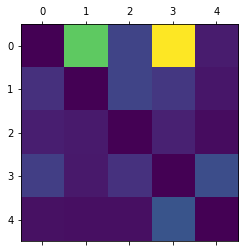

In [15]:
import numpy as np
def GC():
    all_candidate = [[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4]]
    granger_matrix = np.zeros([5, 5])#5*5
    var_denominator = np.zeros([1, 5])#1*5
    for k in range(5):
        tmp_y = np.reshape(y1[:, k], [y1.shape[0], 1])    
        input_set=all_candidate[k]
        hist_result = []
        lstm = CustomLSTM(num_hidden=30, num_channel=len(input_set))
        hist_res = lstm.fit(x1[:, :, input_set], tmp_y, batch_size=64, epochs=100)
        hist_result.append(hist_res)
        var_denominator[0][k] = np.var(lstm.predict(x1[:, :, input_set]) - tmp_y, axis=0)
        for j in range(5):
            if j not in input_set:
                granger_matrix[j][k] = var_denominator[0][k]
            elif len(input_set) == 1:
                tmp_x = x1[:, :, k]
                tmp_x = tmp_x[:, :, np.newaxis]
                granger_matrix[j][k] = np.var(lstm.predict(tmp_x) - tmp_y, axis=0)
            else:
                tmp_x = x1[:, :, input_set]
                channel_del_idx = input_set.index(j)
                tmp_x[:, :, channel_del_idx] = 0
                granger_matrix[j][k] = np.var(lstm.predict(tmp_x) - tmp_y, axis=0)
    granger_matrix = granger_matrix / var_denominator
    for i in range(5):
        granger_matrix[i][i] = 1
    granger_matrix[granger_matrix < 1] = 1
    granger_matrix = np.log(granger_matrix)
    return granger_matrix

granger_matrix=np.zeros((5,5))
for i in range(10):
    granger_matrix +=GC()
granger_matrix=granger_matrix/10
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.matshow(granger_matrix)


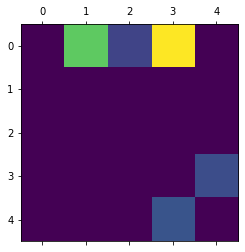

In [17]:
for i in range(5):
    for j in range(5):
        if granger_matrix[i][j]<0.22:
            granger_matrix[i][j]=0
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.matshow(granger_matrix)

In [10]:
simulation_name = 'realization_' + 'linear' + '_' + '4096' + '.mat'
simulation_dir = 'simulation_difflen'
simulation_name = os.path.join(simulation_dir, simulation_name)
simulation_data = sio.loadmat(simulation_name)#5,4096

simulation_data = np.array(simulation_data["data"]).transpose()#4096,5

num_channel = simulation_data.shape[1]#5
scaler = preprocessing.StandardScaler().fit(simulation_data)
simulation_data = scaler.transform(simulation_data)
min_max_scaler = preprocessing.MinMaxScaler()

# scale data to [0. 1]
data = min_max_scaler.fit_transform(simulation_data)#data.shape(4096,5)

[[0.04557156 0.06326086 0.04967669 0.         0.        ]
 [0.03695911 0.0130415  0.         0.02936856 0.00888851]
 [0.10118253 0.         0.02776173 0.12094359 0.42510592]
 [0.07883382 0.         0.10561302 0.23537721 0.35859186]
 [0.0639501  0.01036065 0.15021928 0.29023506 0.56699445]]


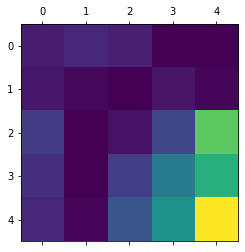

In [49]:
import numpy as np
from sklearn.linear_model import LinearRegression as LR
from sklearn.svm import SVR,LinearSVR
all_candidate = [[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4]]
granger_matrix = np.zeros([5, 5])
var_denominator = np.zeros([1, 5])
for k in range(5):
    tmp_y = y2[:, k]
    # tmp_y = np.reshape(y2[:, k], [y2.shape[0], 1])    
    input_set=all_candidate[k]
    hist_result = []
    x_11=x2[:,:,input_set]
    x_111=np.reshape(x_11,[x_11.shape[0],-1])
    lin_svr=SVR(kernel='rbf',C=10, gamma=0.01)
    # lin_svr=SVR(kernel='poly',degree=3,C=1)
    lr=lin_svr.fit(x_111,tmp_y)
    # lr=LR().fit(x_111,tmp_y)
    var_denominator[0][k] = np.var(lr.predict(x_111) - tmp_y)
    for j in range(5):
        tmp_x = x2[:, :, input_set]
        channel_del_idx = input_set.index(j)
        tmp_x[:, :, channel_del_idx] = 0
        x_1111=np.reshape(tmp_x,[tmp_x.shape[0],-1])
        # lin_svr1=SVR(kernel='poly',degree=3,C=1)
        lin_svr1=SVR(kernel='rbf',C=10, gamma=0.01)
        lr11=lin_svr1.fit(x_1111,tmp_y)
        # lr11=LR().fit(x_1111,tmp_y)
        granger_matrix[j][k] = np.var(lr11.predict(x_1111) - tmp_y)
granger_matrix = granger_matrix / var_denominator
# for i in range(5):
#     granger_matrix[i][i] = 1
granger_matrix[granger_matrix < 1] = 1
granger_matrix = np.log(granger_matrix)
    # return granger_matrix

# granger_matrix=np.zeros((5,5))
# for i in range(10):
#     granger_matrix +=GC()
# granger_matrix=granger_matrix/10
# granger_matrix=GC()
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.matshow(granger_matrix)
print(granger_matrix)
# trueCnt=0
# for i in range(len(x_111)):
#     if svr_rbf.predict(x_111[i])==tmp_y[i]:
#         trueCnt+=1
#     rate=trueCnt / len(tmp_y)

#     trueCnt1=0
#     if svr_rbf1.predict(x_1111[i])==tmp_y[i]:
#         trueCnt1+=1
#     rate1=trueCnt1 / len(tmp_y)
# print('有的正确率为：',rate)
# print('没有的正确率为：',rate1)

[[8.97409145e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.88527080e-01]
 [8.32044804e-02 6.90339538e-01 1.03072131e-03 1.43557747e-01
  0.00000000e+00 1.31206429e-02]
 [6.00748673e-02 3.77140285e-02 6.53048563e-01 1.31530012e-01
  1.61462700e-01 0.00000000e+00]
 [7.13635688e-01 9.93535253e-02 6.58179884e-02 6.59511260e-01
  1.47107155e-02 0.00000000e+00]
 [0.00000000e+00 7.90325683e-01 0.00000000e+00 0.00000000e+00
  1.10355442e+00 1.16869941e-03]
 [6.77156688e-02 1.27088831e-01 5.03810170e-01 0.00000000e+00
  1.73549038e-01 3.45182665e-01]]
0.966263601366765
0.9524473540121146


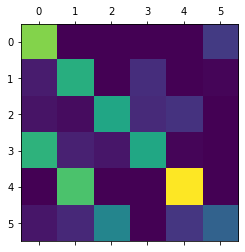

In [13]:
from sklearn.svm import SVR,LinearSVR,SVC
granger_matrix = np.zeros([x2.shape[2], x2.shape[2]])#shape[2]为节点个数，例如五条时间序列则为5*5
var_denominator = np.zeros([1, x2.shape[2]])#这是分母，即所有序列都参与预测的误差，应该比分子大，形状为1*5
for k in range(x2.shape[2]):
    tmp_y = y2[:, k]
    # input_set=all_candidate[k]
    #input_set为[0,1,2,3,4]方便后面拿掉某个序列
    input_set = []
    for i in range(x2.shape[2]):
        input_set.append(i)

    x_11=x2[:,:,input_set]
    #将x拉平，例如x为4085*10*5,则reshape过后是4085*50
    x_111=np.reshape(x_11,[x_11.shape[0],-1])
    #定义线性支持向量回归，如果数据是非线性，则修改为
    # lin_svr = SVR(kernel='poly',degree=3,C=1)
    lin_svr =SVR(kernel='rbf',C=5, gamma=0.01)
    # lin_svr =SVR(kernel='linear')
    # lin_svr = LinearSVR()
    #进行拟合
    hist_res = lin_svr.fit(x_111,tmp_y)
    #得到误差分母，即所有序列都参与
    var_denominator[0][k] = np.var(hist_res.predict(x_111) - tmp_y)
    #这个循环是按顺序拿掉某个序列
    for j in range(x2.shape[2]):
        tmp_x = x2[:, :, input_set]
        #得到需要拿掉的索引，并令那个序列的数据为0
        channel_del_idx = input_set.index(j)
        tmp_x[:, :, channel_del_idx] = 0
        #重新再打平进行SVR回归
        x_1111=np.reshape(tmp_x,[tmp_x.shape[0],-1])
        # lin_svr1 = SVR(kernel='poly',degree=30,C=1)
        lin_svr1 = SVR(kernel='rbf',C=5, gamma=0.01)
        # lin_svr1 = SVR(kernel='linear')
        # lin_svr1 = LinearSVR()
        hist_res1=lin_svr1.fit(x_1111,tmp_y)
        #得到拿掉某个序列的误差，即分子
        granger_matrix[j][k] = np.var(hist_res1.predict(x_1111) - tmp_y)
#循环结束后用分子/分母
granger_matrix = granger_matrix / var_denominator
#令矩阵对角线为1 取对数后为0，原文章这么取的，其实没必要
#令小于1的为1，防止取对数后小于0
granger_matrix[granger_matrix < 1] = 1
#取对数ln python里np.log 就是ln
granger_matrix = np.log(granger_matrix)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.matshow(granger_matrix.T)
print(granger_matrix.T)
print(lin_svr.score(x_111,tmp_y))
print(lin_svr1.score(x_1111,tmp_y))

[[8.97409145e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.88527080e-01]
 [8.32044804e-02 6.90339538e-01 1.03072131e-03 1.43557747e-01
  0.00000000e+00 1.31206429e-02]
 [6.00748673e-02 3.77140285e-02 6.53048563e-01 1.31530012e-01
  1.61462700e-01 0.00000000e+00]
 [7.13635688e-01 9.93535253e-02 6.58179884e-02 6.59511260e-01
  1.47107155e-02 0.00000000e+00]
 [0.00000000e+00 7.90325683e-01 0.00000000e+00 0.00000000e+00
  1.10355442e+00 1.16869941e-03]
 [6.77156688e-02 1.27088831e-01 5.03810170e-01 0.00000000e+00
  1.73549038e-01 3.45182665e-01]]
0.966263601366765
0.9524473540121146


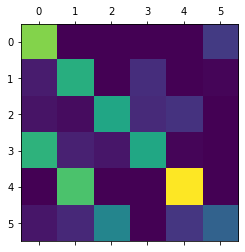

In [10]:
from sklearn.svm import SVR,LinearSVR,SVC
granger_matrix = np.zeros([x2.shape[2], x2.shape[2]])#shape[2]为节点个数，例如五条时间序列则为5*5
var_denominator = np.zeros([1, x2.shape[2]])#这是分母，即所有序列都参与预测的误差，应该比分子大，形状为1*5
for k in range(x2.shape[2]):
    tmp_y = y2[:, k]
    # input_set=all_candidate[k]
    #input_set为[0,1,2,3,4]方便后面拿掉某个序列
    input_set = []
    for i in range(x2.shape[2]):
        input_set.append(i)

    x_11=x2[:,:,input_set]
    #将x拉平，例如x为4085*10*5,则reshape过后是4085*50
    x_111=np.reshape(x_11,[x_11.shape[0],-1])
    #定义线性支持向量回归，如果数据是非线性，则修改为
    # lin_svr = SVR(kernel='poly',degree=3,C=1)
    lin_svr =SVR(kernel='rbf',C=5, gamma=0.01)
    # lin_svr =SVR(kernel='linear')
    # lin_svr = LinearSVR()
    #进行拟合
    hist_res = lin_svr.fit(x_111,tmp_y)
    #得到误差分母，即所有序列都参与
    var_denominator[0][k] = np.var(hist_res.predict(x_111) - tmp_y)
    #这个循环是按顺序拿掉某个序列
    for j in range(x2.shape[2]):
        tmp_x = x2[:, :, input_set]
        #得到需要拿掉的索引，并令那个序列的数据为0
        channel_del_idx = input_set.index(j)
        tmp_x[:, :, channel_del_idx] = 0
        #重新再打平进行SVR回归
        x_1111=np.reshape(tmp_x,[tmp_x.shape[0],-1])
        # lin_svr1 = SVR(kernel='poly',degree=30,C=1)
        lin_svr1 = SVR(kernel='rbf',C=5, gamma=0.01)
        # lin_svr1 = SVR(kernel='linear')
        # lin_svr1 = LinearSVR()
        hist_res1=lin_svr1.fit(x_1111,tmp_y)
        #得到拿掉某个序列的误差，即分子
        granger_matrix[j][k] = np.var(hist_res1.predict(x_1111) - tmp_y)
#循环结束后用分子/分母
granger_matrix = granger_matrix / var_denominator
#令矩阵对角线为1 取对数后为0，原文章这么取的，其实没必要
#令小于1的为1，防止取对数后小于0
granger_matrix[granger_matrix < 1] = 1
#取对数ln python里np.log 就是ln
granger_matrix = np.log(granger_matrix)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.matshow(granger_matrix.T)
print(granger_matrix.T)
print(lin_svr.score(x_111,tmp_y))
print(lin_svr1.score(x_1111,tmp_y))

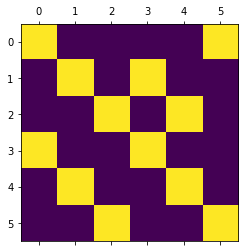

In [14]:
y_label = [[1,0,0,0,0,1],[0,1,0,1,0,0],[0,0,1,0,1,0],[1,0,0,1,0,0],[0,1,0,0,1,0],[0,0,1,0,0,1]]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.matshow(y_label)

In [17]:
from sklearn.metrics import roc_curve
 
fpr, tpr, thersholds = roc_curve(np.array(y_label).ravel(),y_new)
 
for i, value in enumerate(thersholds):
    print("%f %f %f" % (fpr[i], tpr[i], value))

0.000000 0.000000 2.000000
0.000000 0.083333 1.000000
0.000000 0.833333 0.170836
0.041667 0.833333 0.157264
0.041667 1.000000 0.130087
0.541667 1.000000 0.000934
1.000000 1.000000 0.000000


In [18]:
y_new = np.array(granger_matrix.T).ravel()/np.max(np.array(granger_matrix.T).ravel())

In [22]:
np.array(granger_matrix.T).ravel()

array([8.97409145e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.88527080e-01, 8.32044804e-02, 6.90339538e-01,
       1.03072131e-03, 1.43557747e-01, 0.00000000e+00, 1.31206429e-02,
       6.00748673e-02, 3.77140285e-02, 6.53048563e-01, 1.31530012e-01,
       1.61462700e-01, 0.00000000e+00, 7.13635688e-01, 9.93535253e-02,
       6.58179884e-02, 6.59511260e-01, 1.47107155e-02, 0.00000000e+00,
       0.00000000e+00, 7.90325683e-01, 0.00000000e+00, 0.00000000e+00,
       1.10355442e+00, 1.16869941e-03, 6.77156688e-02, 1.27088831e-01,
       5.03810170e-01, 0.00000000e+00, 1.73549038e-01, 3.45182665e-01])

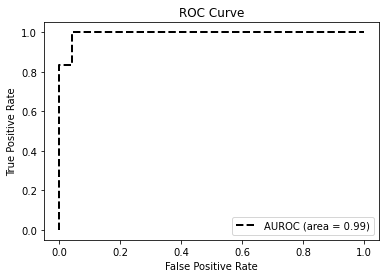

In [25]:
from sklearn.metrics import auc
 
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'k--', label='AUROC (area = {0:.2f})'.format(roc_auc), lw=2)
 
plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  # 可以使用中文，但需要导入一些库即字体
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

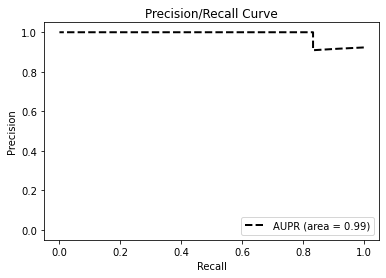

In [28]:
#coding:utf-8
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
plt.figure("P-R Curve")
plt.title('Precision/Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
#y_true为样本实际的类别，y_scores为样本为正例的概率
precision, recall, thresholds = precision_recall_curve(np.array(y_label).ravel(),y_new)
#print(precision)
#print(recall)
#print(thresholds)
pr_auc = auc(recall, precision)
plt.plot(recall,precision,'k--',label='AUPR (area = {0:.2f})'.format(pr_auc),lw=2)
plt.legend(loc="lower right")
plt.show()

In [27]:
pr_auc

0.9860625485625486

In [14]:
np.array(y_label).ravel()

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
def calcKernel():
    '''
    计算核函数
    使用的是高斯核 详见“7.3.3 常用核函数” 式7.90
    :return: 高斯核矩阵
    '''
    #初始化高斯核结果矩阵 大小 = 训练集长度m * 训练集长度m
    #k[i][j] = Xi * Xj
    k = [[0 for i in range(x2.shape[2])] for j in range(x2.shape[2])]
    #大循环遍历Xi，Xi为式7.90中的x
    for i in range(x2.shape[2]):
        #每100个打印一次
        #不能每次都打印，会极大拖慢程序运行速度
        #因为print是比较慢的
        if i % 100 == 0:
            print('construct the kernel:', i, x2.shape[2])
        #得到式7.90中的X
        X = self.trainDataMat[i, :]
        #小循环遍历Xj，Xj为式7.90中的Z
        # 由于 Xi * Xj 等于 Xj * Xi，一次计算得到的结果可以
        # 同时放在k[i][j]和k[j][i]中，这样一个矩阵只需要计算一半即可
        #所以小循环直接从i开始
        for j in range(i, self.m):
            #获得Z
            Z = self.trainDataMat[j, :]
            #先计算||X - Z||^2
            result = (X - Z) * (X - Z).T
            #分子除以分母后去指数，得到的即为高斯核结果
            result = np.exp(-1 * result / (2 * self.sigma**2))
            #将Xi*Xj的结果存放入k[i][j]和k[j][i]中
            k[i][j] = result
            k[j][i] = result
    #返回高斯核矩阵
    return k

In [44]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics.pairwise import rbf_kernel
import pandas as pd
 
 
if __name__ == '__main__':
    X, y = load_iris(return_X_y=True)
    a = [1,2,3,4,5,6,7,8]
    b = [110,111]
    A = X[a]
    B = X[b]
    K = rbf_kernel(X=A,Y=B)
    print(K)
    c = [110]
    C = X[c]
    print(C)
    K = rbf_kernel(X=A,Y=C)
    print(K)

[[0.00757805 0.00603608]
 [0.00535353 0.00405624]
 [0.00704808 0.00561395]
 [0.00794669 0.00542086]
 [0.01915867 0.01212483]
 [0.00636144 0.00463092]
 [0.00982819 0.00711891]
 [0.00471267 0.00394621]]
[[6.5 3.2 5.1 2. ]]
[[0.00757805]
 [0.00535353]
 [0.00704808]
 [0.00794669]
 [0.01915867]
 [0.00636144]
 [0.00982819]
 [0.00471267]]


In [59]:
K1 = rbf_kernel(X=x2RS,Y=x2RS)
K1.shape

(49, 49)

In [9]:
x2RS=x2.reshape(x2.shape[0],-1)
x2RS.shape

(49, 6)

d:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\svm\_bas

[[5.06430389 1.00359934 0.44160246 4.21025699 0.         0.        ]
 [0.         0.46178614 0.         0.74709031 0.75650043 0.55206471]
 [0.13518699 0.         1.55684384 0.         0.         3.42510884]
 [0.37920354 0.         0.         4.50089118 0.         0.70487216]
 [1.46165085 1.79510713 3.03264894 0.54400115 4.23051489 0.29828215]
 [0.38470604 0.         0.         0.         0.         2.22826518]]
0.9999796981840441
0.9998099235920973


d:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


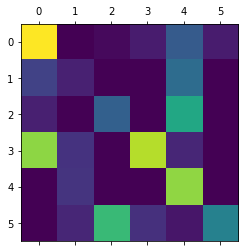

In [75]:
from sklearn.svm import SVR,LinearSVR,SVC
granger_matrix = np.zeros([x2.shape[2], x2.shape[2]])#shape[2]为节点个数，例如五条时间序列则为5*5
var_denominator = np.zeros([1, x2.shape[2]])#这是分母，即所有序列都参与预测的误差，应该比分子大，形状为1*5
for k in range(x2.shape[2]):
    tmp_y = y2[:, k]
    # input_set=all_candidate[k]
    #input_set为[0,1,2,3,4]方便后面拿掉某个序列
    input_set = []
    for i in range(x2.shape[2]):
        input_set.append(i)

    x_11=x2[:,:,input_set]
    #将x拉平，例如x为4085*10*5,则reshape过后是4085*50
    x_111=np.reshape(x_11,[x_11.shape[0],-1])
    K1 = rbf_kernel(X=x_111,Y=x_111, gamma=1)

    #定义线性支持向量回归，如果数据是非线性，则修改为
    # lin_svr = SVR(kernel='poly',degree=3,C=1)
    # lin_svr =SVR(kernel='rbf',C=5, gamma=0.01)
    # lin_svr =SVR(kernel='linear')
    lin_svr = LinearSVR(max_iter=1e6,C=100)
    #进行拟合
    hist_res = lin_svr.fit(K1,tmp_y)
    #得到误差分母，即所有序列都参与
    var_denominator[0][k] = np.var(hist_res.predict(K1) - tmp_y)
    #这个循环是按顺序拿掉某个序列
    for j in range(x2.shape[2]):
        tmp_x = x2[:, :, input_set]
        #得到需要拿掉的索引，并令那个序列的数据为0
        channel_del_idx = input_set.index(j)
        tmp_x[:, :, channel_del_idx] = 0
        #重新再打平进行SVR回归
        x_1111=np.reshape(tmp_x,[tmp_x.shape[0],-1])
        K2 = rbf_kernel(X=x_1111,Y=x_1111, gamma=1)
        # lin_svr1 = SVR(kernel='poly',degree=30,C=1)
        # lin_svr1 = SVR(kernel='rbf',C=5, gamma=0.01)
        # lin_svr1 = SVR(kernel='linear',C=10)
        lin_svr1 = LinearSVR(max_iter=1e6,C=100)
        hist_res1=lin_svr1.fit(K2,tmp_y)
        #得到拿掉某个序列的误差，即分子
        granger_matrix[j][k] = np.var(hist_res1.predict(K2) - tmp_y)
#循环结束后用分子/分母
granger_matrix = granger_matrix / var_denominator
#令矩阵对角线为1 取对数后为0，原文章这么取的，其实没必要
#令小于1的为1，防止取对数后小于0
granger_matrix[granger_matrix < 1] = 1
#取对数ln python里np.log 就是ln
granger_matrix = np.log(granger_matrix)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.matshow(granger_matrix.T)
print(granger_matrix)
print(lin_svr.score(K1,tmp_y))
print(lin_svr1.score(K2,tmp_y))

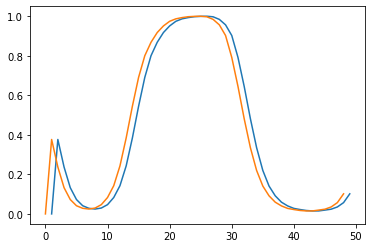

In [34]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(1,49,49),x2RS[:,2])
from scipy.interpolate import Rbf
rf = Rbf(np.linspace(1,49,49),x2RS[ :,2])
rf1=rf(np.linspace(1,49,49))
plt.plot(rf1)



In [26]:
np.linspace(1,48,2)

array([ 1., 48.])

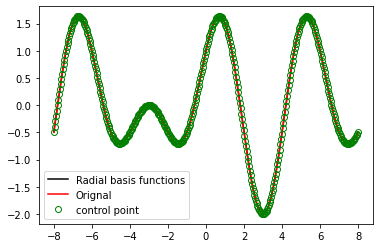

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

f = lambda x: np.sin(np.pi*x/2)+np.cos(np.pi*x/3)
snum = 20   # control point数量
ratio = 20  # 总数据点数量：snum*ratio
xs = -8
xe = 8
x1 = np.linspace(xs,xe,snum)				# control points
x2 = np.linspace(xs,xe,(snum-1)*ratio+1)	# 作图总数据点
y1 = f(x1)			# control points
rf = Rbf(x1, y1)	# reconstructed Rbf function
y2 = rf(x2)  		# Rbf reconstruction
plt.plot(x2, y2, 'k-', x2, f(x2),'r-', x1, y1, 'go', markerfacecolor='none')
plt.legend(["Radial basis functions", "Orignal", "control point"],loc='best')
plt.show()


In [82]:
x10 = np.linspace(-5,5,2)
x10

array([-5.,  5.])

C:\Users\DELL\AppData\Local\Temp\ipykernel_18120\450672656.py:109: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  _x = sum([x[j] for j in km[i]]) / len(km[i])
C:\Users\DELL\AppData\Local\Temp\ipykernel_18120\450672656.py:110: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  _y = sum([y[j] for j in km[i]]) / len(km[i])
C:\Users\DELL\AppData\Local\Temp\ipykernel_18120\450672656.py:179: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


7.926643072687254
7.926643072687254


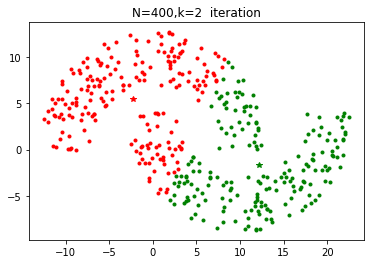

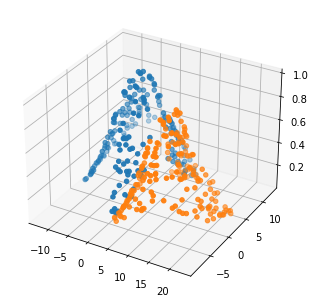

In [76]:
# coding:utf-8
import numpy as np
import pylab as pl
import random as rd
import imageio
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d
from mpl_toolkits.mplot3d import Axes3D

from scipy import *
from scipy.linalg import norm, pinv
 
from matplotlib import pyplot as plt
random.seed(0)

#定义sigmoid函数和它的导数
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))
def sigmoid_derivate(x):
    return x*(1-x) #sigmoid函数的导数


class moon_data_class(object):
    def __init__(self,N,d,r,w):
        self.N=N
        self.w=w
      
        self.d=d
        self.r=r
    
   
    def sgn(self,x):
        if(x>0):
            return 1;
        else:
            return -1;
        
    def sig(self,x):
        return 1.0/(1+np.exp(x))
    
        
    def dbmoon(self):
        N1 = 10*self.N
        N = self.N
        r = self.r
        w2 = self.w/2
        d = self.d
        done = True
        data = np.empty(0)
        while done:
            #generate Rectangular data
            tmp_x = 2*(r+w2)*(np.random.random([N1, 1])-0.5)
            tmp_y = (r+w2)*np.random.random([N1, 1])
            tmp = np.concatenate((tmp_x, tmp_y), axis=1)
            tmp_ds = np.sqrt(tmp_x*tmp_x + tmp_y*tmp_y)
            #generate double moon data ---upper
            idx = np.logical_and(tmp_ds > (r-w2), tmp_ds < (r+w2))
            idx = (idx.nonzero())[0]
     
            if data.shape[0] == 0:
                data = tmp.take(idx, axis=0)
            else:
                data = np.concatenate((data, tmp.take(idx, axis=0)), axis=0)
            if data.shape[0] >= N:
                done = False
        #print (data)
        db_moon = data[0:N, :]
        #print (db_moon)
        #generate double moon data ----down
        data_t = np.empty([N, 2])
        data_t[:, 0] = data[0:N, 0] + r
        data_t[:, 1] = -data[0:N, 1] - d
        db_moon = np.concatenate((db_moon, data_t), axis=0)
        return db_moon

def distance(a, b):
    return (a[0]- b[0]) ** 2 + (a[1] - b[1]) ** 2
#K均值算法
def k_means(input_cells, k_count):
    count = len(input_cells)      #点的个数
    x = input_cells[0:count, 0]
    y = input_cells[0:count, 1]
    #随机选择K个点
    k = rd.sample(range(count), k_count)
    
    k_point = [[x[i], [y[i]]] for i in k]   #保证有序
    k_point.sort()

    global frames
    #global step
    while True:
        km = [[] for i in range(k_count)]      #存储每个簇的索引
        #遍历所有点
        for i in range(count):
            cp = [x[i], y[i]]                   #当前点
            #计算cp点到所有质心的距离
            _sse = [distance(k_point[j], cp) for j in range(k_count)]
            #cp点到那个质心最近
            min_index = _sse.index(min(_sse))   
            #把cp点并入第i簇
            km[min_index].append(i)
        #更换质心
       
        k_new = []
        for i in range(k_count):
            _x = sum([x[j] for j in km[i]]) / len(km[i])
            _y = sum([y[j] for j in km[i]]) / len(km[i])
            k_new.append([_x, _y])
        k_new.sort()        #排序
    
        if (k_new != k_point):#一直循环直到聚类中心没有变化
            k_point = k_new
        else:
            pl.figure()
            pl.title("N=%d,k=%d  iteration"%(count,k_count))
            for j in range(k_count):
                pl.plot([x[i] for i in km[j]], [y[i] for i in km[j]], color[j%4])
                pl.plot(k_point[j][0], k_point[j][1], dcolor[j%4])
            return k_point,km
    
def Phi(a,b):
    return norm(a-b)

def gaussian (x, sigma):
    return np.exp(-x**2 / (2 * sigma**2))
        
if __name__ == '__main__':
    
    #计算平面两点的欧氏距离
    step=0
    color=['.r','.g','.b','.y']#颜色种类
    dcolor=['*r','*g','*b','*y']#颜色种类
    frames = []
    
    N = 200
    d = -4
    r = 10
    width = 6
        
    data_source = moon_data_class(N, d, r, width)
    data = data_source.dbmoon()
       # x0 = [1 for x in range(1,401)]
    input_cells = np.array([np.reshape(data[0:2*N, 0], len(data)), np.reshape(data[0:2*N, 1], len(data))]).transpose()
        
    labels_pre = [[1] for y in range(1, 201)]
    labels_pos = [[0] for y in range(1, 201)]
    labels=labels_pre+labels_pos
    
    
    k_count = 2 
    center,km = k_means(input_cells, k_count)
    test = Phi(input_cells[1],np.array(center[0]))
    print(test)
    test = distance(input_cells[1],np.array(center[0]))
    print(np.sqrt(test))
    count = len(input_cells)  
    x = input_cells[0:count, 0]
    y = input_cells[0:count, 1]
    center_array = []

    for j in range(k_count):
       
           center_array.append([[x[i] for i in km[j]], [y[i] for i in km[j]]])
    Sigma_Array = []
    for j in range(k_count):
        Sigma = []
        for i in range(len(center_array[j][0])):
            temp =  Phi(np.array([center_array[j][0][i],center_array[j][1][i]]),np.array(center[j]))
            Sigma.append(temp)
      
        Sigma = np.array(Sigma)
        Sigma_Array.append(np.cov(Sigma))
    
    gaussian_kernel_array = []
    fig = plt.figure()
    ax = Axes3D(fig)
    
    for j in range(k_count):
        gaussian_kernel = []
        for i in range(len(center_array[j][0])):
            temp =  Phi(np.array([center_array[j][0][i],center_array[j][1][i]]),np.array(center[j]))
            temp1 = gaussian(temp,Sigma_Array[0])
            gaussian_kernel.append(temp1)
        
        gaussian_kernel_array.append(gaussian_kernel)
        
        ax.scatter(center_array[j][0], center_array[j][1], gaussian_kernel_array[j],s=20)
    plt.show()


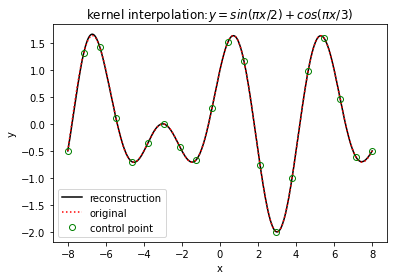

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def gen_data(x1,x2):
    y_sample = np.sin(np.pi*x1/2)+np.cos(np.pi*x1/3)
    y_all = np.sin(np.pi*x2/2)+np.cos(np.pi*x2/3)
    return y_sample, y_all

def kernel_interpolation(y_sample,x1,sig):
    gaussian_kernel = lambda x,c,h: np.exp(-(x-x[c])**2/(2*(h**2)))
    num = len(y_sample)
    w = np.zeros(num)
    int_matrix = np.asmatrix(np.zeros((num,num)))
    for i in range(num):
        int_matrix[i,:] = gaussian_kernel(x1,i,sig)  
    w = int_matrix.I * np.asmatrix(y_sample).T      
    return w

def kernel_interpolation_rec(w,x1,x2,sig):
    gkernel = lambda x,xc,h: np.exp(-(x-xc)**2/(2*(h**2)))
    num = len(x2)
    y_rec = np.zeros(num)
    for i in range(num):
        for k in range(len(w)):
            y_rec[i] = y_rec[i] + w[k]*gkernel(x2[i],x1[k],sig)
    return y_rec

if __name__ == '__main__':
    snum = 20   # control point数量
    ratio = 20  # 总数据点数量：snum*ratio
    sig = 1		# 核函数宽度
    xs = -8
    xe = 8
    x1 = np.linspace(xs,xe,snum)
    x2 = np.linspace(xs,xe,(snum-1)*ratio+1)
    y_sample, y_all = gen_data(x1,x2)
    plt.figure(1)
    w = kernel_interpolation(y_sample,x1,sig)   
    y_rec = kernel_interpolation_rec(w,x1,x2,sig)
    plt.plot(x2,y_rec,'k')
    plt.plot(x2,y_all,'r:')        
    plt.ylabel('y')
    plt.xlabel('x')
    for i in range(len(x1)):        
        plt.plot(x1[i],y_sample[i],'go',markerfacecolor='none')        
        
    plt.legend(labels=['reconstruction','original','control point'],loc='lower left')
    plt.title('kernel interpolation:$y=sin(\pi x/2)+cos(\pi x/3)$')       
    plt.show()


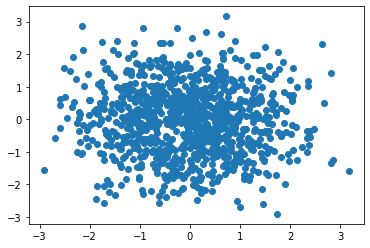

In [161]:
plt.scatter(x2rshp[:,0],y2[:,0])

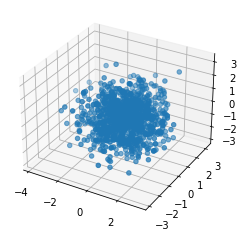

In [162]:
#方法一，利用关键字
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#定义坐标轴
fig = plt.figure()
ax1 = plt.axes(projection='3d')
#ax = fig.add_subplot(111,projection='3d')  #这种方法也可以画多个子图
import numpy as np
# z = np.linspace(0,13,1000)
# x = 5*np.sin(z)
# y = 5*np.cos(z)
# zd = 13*np.random.random(100)
# xd = 5*np.sin(zd)
# yd = 5*np.cos(zd)
zd=y2[:,0]
xd=x2rshp[:,1]
yd=x2rshp[:,0]
ax1.scatter(xd,yd,zd)#(yd,zd, cmap='Blues')  #绘制散点图
# ax1.plot3D(x,y,z,'gray')    #绘制空间曲线
plt.show()

In [11]:
print(lr11.score(x_1111,tmp_y))

0.5975122840650464


In [8]:
granger_matrix

array([[0.        , 0.47996797, 0.20906705, 0.50494005, 0.01984086],
       [0.01735211, 0.        , 0.02477299, 0.02531995, 0.01789322],
       [0.03242065, 0.02857868, 0.        , 0.01652157, 0.0251832 ],
       [0.01501299, 0.02254724, 0.0238388 , 0.        , 0.14890423],
       [0.03018096, 0.03479541, 0.02095724, 0.13340617, 0.        ]])

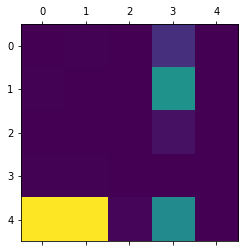

In [35]:
import numpy as np
from sklearn.linear_model import LinearRegression as LR
from sklearn.svm import SVR
# def GC():
all_candidate = [[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4]]
granger_matrix = np.zeros([5, 5])#5*5
var_denominator = np.zeros([1, 5])#1*5
for k in range(5):
    tmp_y = np.reshape(y2[:, k], [y2.shape[0], 1])
    tmp_y=tmp_y.ravel()    
    input_set=all_candidate[k]
    hist_result = []
    x_11=x2[:,:,input_set]
    x_111=np.reshape(x_11,[x_11.shape[0],-1])
    lr=LR().fit(x_111,tmp_y)
    # lstm = CustomLSTM(num_hidden=30, num_channel=len(input_set))
    # svr_rbf = SVR(kernel='rbf', C=1e3,gamma=0.01)# gamma=0.1C=1e3
    # hist_res = svr_rbf.fit(x_111,tmp_y)
    # hist_res = lstm.fit(x1[:, :, input_set], tmp_y, batch_size=64, epochs=100)
    # hist_result.append(hist_res)
    var_denominator[0][k] = np.var(lr.predict(x_111) - tmp_y)
    for j in range(5):
        # if j not in input_set:
        #     granger_matrix[j][k] = var_denominator[0][k]
        # elif len(input_set) == 1:
        #     tmp_x = x1[:, :, k]
        #     tmp_x = tmp_x[:, :, np.newaxis]
        #     granger_matrix[j][k] = np.var(svr_rbf.predict(tmp_x) - tmp_y, axis=0)
        # else:
        tmp_x = x2[:, :, input_set]
        channel_del_idx = input_set.index(j)
        tmp_x[:, :, channel_del_idx] = 0
        x_1111=np.reshape(tmp_x,[tmp_x.shape[0],-1])
        lr11=LR().fit(x_1111,tmp_y)
        # svr_rbf1 = SVR(kernel='rbf', C=1e3,gamma=0.01)
        # svr_rbf1.fit(x_1111,tmp_y)
        granger_matrix[j][k] = np.var(lr11.predict(x_1111) - tmp_y)
granger_matrix = granger_matrix / var_denominator
for i in range(5):
    granger_matrix[i][i] = 1
granger_matrix[granger_matrix < 1] = 1
granger_matrix = np.log(granger_matrix)
    # return granger_matrix

# granger_matrix=np.zeros((5,5))
# for i in range(10):
#     granger_matrix +=GC()
# granger_matrix=granger_matrix/10
# granger_matrix=GC()
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.matshow(granger_matrix)

In [8]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

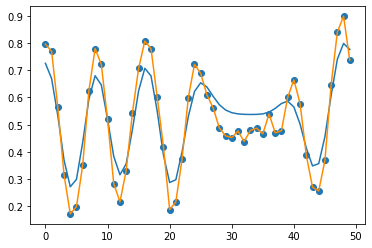

In [44]:
plt.scatter(a11,data[:50,0])
plt.plot(a11,yrbf)
plt.plot(data[:50,0:1],color='darkorange')

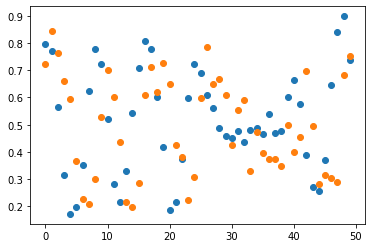

In [59]:
plt.scatter(a11,data[:50,0])
plt.scatter(a11,data[:50,1])

In [19]:
model=LinearSVR
model.fit(x_111,tmp_y,epochs=100,batch_size=64)

TypeError: fit() got an unexpected keyword argument 'epochs'

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_50 (LSTM)              (None, 30)                4320      
                                                                 
 dense_50 (Dense)            (None, 1)                 31        
                                                                 
Total params: 4,351
Trainable params: 4,351
Non-trainable params: 0
_________________________________________________________________


e:\111\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/100
13/13 - 3s - loss: 0.0791 - val_loss: 0.0195 - 3s/epoch - 262ms/step
Epoch 2/100
13/13 - 0s - loss: 0.0182 - val_loss: 0.0183 - 191ms/epoch - 15ms/step
Epoch 3/100
13/13 - 0s - loss: 0.0179 - val_loss: 0.0218 - 154ms/epoch - 12ms/step
Epoch 4/100
13/13 - 0s - loss: 0.0169 - val_loss: 0.0162 - 197ms/epoch - 15ms/step
Epoch 5/100
13/13 - 0s - loss: 0.0151 - val_loss: 0.0147 - 172ms/epoch - 13ms/step
Epoch 6/100
13/13 - 0s - loss: 0.0137 - val_loss: 0.0149 - 170ms/epoch - 13ms/step
Epoch 7/100
13/13 - 0s - loss: 0.0132 - val_loss: 0.0119 - 135ms/epoch - 10ms/step
Epoch 8/100
13/13 - 0s - loss: 0.0114 - val_loss: 0.0126 - 201ms/epoch - 15ms/step
Epoch 9/100
13/13 - 0s - loss: 0.0109 - val_loss: 0.0109 - 167ms/epoch - 13ms/step
Epoch 10/100
13/13 - 0s - loss: 0.0105 - val_loss: 0.0098 - 203ms/epoch - 16ms/step
Epoch 11/100
13/13 - 0s - loss: 0.0091 - val_loss: 0.0099 - 235ms/epoch - 18ms/step
Epoch 12/100
13/13 - 0s - loss: 0.0094 - val_loss: 0.0088 - 242ms/epoch - 19ms/step
Epo

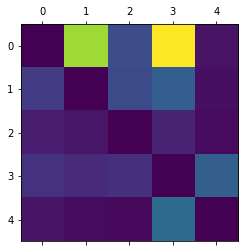

In [12]:
import numpy as np
def GC():
    all_candidate = [[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4]]
    granger_matrix = np.zeros([5, 5])#5*5
    var_denominator = np.zeros([1, 5])#1*5
    for k in range(5):
        tmp_y = np.reshape(y1[:, k], [y1.shape[0], 1])    
        input_set=all_candidate[k]
        hist_result = []
        lstm = CustomLSTM(num_hidden=30, num_channel=len(input_set))
        hist_res = lstm.fit(x1[:, :, input_set], tmp_y, batch_size=64, epochs=100)
        hist_result.append(hist_res)
        var_denominator[0][k] = np.var(lstm.predict(x1[:, :, input_set]) - tmp_y, axis=0)
        for j in range(5):
            if j not in input_set:
                granger_matrix[j][k] = var_denominator[0][k]
            elif len(input_set) == 1:
                tmp_x = x1[:, :, k]
                tmp_x = tmp_x[:, :, np.newaxis]
                granger_matrix[j][k] = np.var(lstm.predict(tmp_x) - tmp_y, axis=0)
            else:
                tmp_x = x1[:, :, input_set]
                channel_del_idx = input_set.index(j)
                tmp_x[:, :, channel_del_idx] = 0
                granger_matrix[j][k] = np.var(lstm.predict(tmp_x) - tmp_y, axis=0)
    granger_matrix = granger_matrix / var_denominator
    for i in range(5):
        granger_matrix[i][i] = 1
    granger_matrix[granger_matrix < 1] = 1
    granger_matrix = np.log(granger_matrix)
    return granger_matrix

granger_matrix=np.zeros((5,5))
for i in range(10):
    granger_matrix +=GC()
granger_matrix=granger_matrix/10
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.matshow(granger_matrix)

In [29]:
import datetime
class RNN_GC(object):
    def __init__(self, opt, num_hidden, mode):#(opt,30,linear)
        self.sequence_length = opt.sequence_length
        self.batch_size = opt.batch_size
        self.num_shift = opt.num_shift
        self.num_hidden = num_hidden
        self.num_epoch = opt.num_epoch
        self.theta = opt.theta
        self.data_length = opt.data_length
        self.weight_decay = opt.weight_decay

        self.mode = mode

    def load_sequence_data(self):
        simulation_name = 'realization_' + self.mode + '_' + str(self.data_length) + '.mat'
        simulation_dir = 'simulation_difflen'
        simulation_name = os.path.join(simulation_dir, simulation_name)
        simulation_data = sio.loadmat(simulation_name)#5,4096

        simulation_data = np.array(simulation_data["data"]).transpose()#4096,5

        self.num_channel = simulation_data.shape[1]#5
        scaler = preprocessing.StandardScaler().fit(simulation_data)
        simulation_data = scaler.transform(simulation_data)
        min_max_scaler = preprocessing.MinMaxScaler()

        # scale data to [0. 1]
        data = min_max_scaler.fit_transform(simulation_data)#data.shape(4096,5)

        x, y = batch_sequence(data, num_shift=self.num_shift,
                              sequence_length=self.sequence_length)
        return x, y

    def nue(self):
        x, y = self.load_sequence_data()

        granger_matrix = np.zeros([self.num_channel, self.num_channel])#5*5
        var_denominator = np.zeros([1, self.num_channel])#1*5
        all_candidate = [[0,3],[0],[0],[0,3,4],[0,3,4]]
        error_model = []
        error_all = []

        hist_result = []
        start_time = datetime.datetime.now()

        for k in range(self.num_channel):

            tmp_y = np.reshape(y[:, k], [y.shape[0], 1])#4085*1
            channel_set = list(range(self.num_channel))

            input_set = []
            last_error = 0
            # NUE 
            # for i in range(self.num_channel):

            #     min_error = 1e7
            #     min_idx = 0
            #     for x_idx in channel_set:
            #         tmp_set = copy.copy(input_set)
            #         tmp_set.append(x_idx)
            #         tmp_x = x[:, :, tmp_set]#4085*10*1循环向后扫描

            #         lstm = CustomLSTM(num_hidden=self.num_hidden, num_channel=len(tmp_set),
            #                           weight_decay=self.weight_decay)#num_hidden=30,num_channel=1,
            #         lstm.fit(tmp_x, tmp_y, batch_size=self.batch_size, epochs=self.num_epoch)
            #         tmp_error = np.mean((lstm.predict(tmp_x) - tmp_y) ** 2)
            #         if tmp_error < min_error:
            #             min_error = tmp_error
            #             min_idx = x_idx
            #         error_all.append([k, i, x_idx, tmp_error])
            #     error_model.append([k, last_error, min_error])
            #     if i != 0 and (np.abs(last_error - min_error) / last_error < self.theta or last_error < min_error):
            #         break
            #     # print('the model of input number is %d' %len(tmp_set))
            #     input_set.append(min_idx)
            #     channel_set.remove(min_idx)
            #     last_error = min_error#epsino(t)

            # all_candidate.append(input_set)
            input_set=all_candidate[k]
            lstm = CustomLSTM(num_hidden=self.num_hidden, num_channel=len(input_set))
            hist_res = lstm.fit(x[:, :, input_set], tmp_y, batch_size=self.batch_size, epochs=self.num_epoch)
            hist_result.append(hist_res)
            var_denominator[0][k] = np.var(lstm.predict(x[:, :, input_set]) - tmp_y, axis=0)
            for j in range(self.num_channel):
                if j not in input_set:
                    granger_matrix[j][k] = var_denominator[0][k]
                elif len(input_set) == 1:
                    tmp_x = x[:, :, k]
                    tmp_x = tmp_x[:, :, np.newaxis]
                    granger_matrix[j][k] = np.var(lstm.predict(tmp_x) - tmp_y, axis=0)
                else:
                    tmp_x = x[:, :, input_set]
                    channel_del_idx = input_set.index(j)
                    tmp_x[:, :, channel_del_idx] = 0
                    granger_matrix[j][k] = np.var(lstm.predict(tmp_x) - tmp_y, axis=0)

            print('train the model for %d output' % (k + 1))

        granger_matrix = granger_matrix / var_denominator
        for i in range(self.num_channel):
            granger_matrix[i][i] = 1
        granger_matrix[granger_matrix < 1] = 1
        granger_matrix = np.log(granger_matrix)

        end_time = datetime.datetime.now()
        interval = (end_time - start_time).seconds
        print('training time: %d seconds' % int(interval))
        return granger_matrix


In [10]:
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping
from keras.layers import Dense,LSTM
import tensorflow as tf
model=Sequential()
model.add(LSTM(units=30,input_dim=5))
model.add(Dense(1))
# model.summary()
summary_writer = tf.summary.create_file_writer('./log')
# from tensorflow.keras.utils import plot_model
# plot_model(model, to_file='DResLayer_model.png', show_shapes=True)

In [2]:
model.compile(loss='mean_squared_error',optimizer=RMSprop(lr=0.001,rho=0.9,epsilon=1e-6))

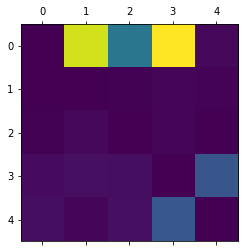

In [8]:
import numpy as np
from sklearn.svm import LinearSVR
# def GC():
all_candidate = [[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4]]
granger_matrix = np.zeros([5, 5])#5*5
var_denominator = np.zeros([1, 5])#1*5
for k in range(5):
    tmp_y = np.reshape(y1[:, k], [y1.shape[0], 1])
    tmp_y=tmp_y.ravel()    
    input_set=all_candidate[k]
    hist_result = []
    x_11=x1[:,:,input_set]
    x_111=np.reshape(x_11,[x_11.shape[0],-1])
    lin_svr = LinearSVR(max_iter=1e5)# gamma=0.1C=1e3
    hist_res = lin_svr.fit(x_111,tmp_y)
    var_denominator[0][k] = np.var(hist_res.predict(x_111) - tmp_y)
    for j in range(5):
        tmp_x = x1[:, :, input_set]
        channel_del_idx = input_set.index(j)
        tmp_x[:, :, channel_del_idx] = 0
        x_1111=np.reshape(tmp_x,[tmp_x.shape[0],-1])
        lin_svr1 = LinearSVR(max_iter=1e5)
        hist_res1=lin_svr1.fit(x_1111,tmp_y)
        granger_matrix[j][k] = np.var(hist_res1.predict(x_1111) - tmp_y)
granger_matrix = granger_matrix / var_denominator
for i in range(5):
    granger_matrix[i][i] = 1
granger_matrix[granger_matrix < 1] = 1
granger_matrix = np.log(granger_matrix)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.matshow(granger_matrix)

In [9]:
granger_matrix

array([[0.        , 0.45250757, 0.19046269, 0.48650331, 0.01126083],
       [0.00076605, 0.        , 0.00311909, 0.00778445, 0.00434591],
       [0.00291507, 0.01008993, 0.        , 0.00696953, 0.        ],
       [0.01350205, 0.01923235, 0.01782523, 0.        , 0.13000597],
       [0.01727616, 0.00903891, 0.01969866, 0.13176648, 0.        ]])

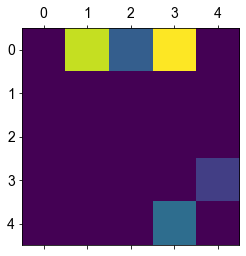

In [32]:
for i in range(5):
    for j in range(5):
        if granger_matrix[i][j] <0.1:
            granger_matrix[i][j]=0
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.matshow(granger_matrix)

In [11]:
def load_sequence_data():
    simulation_name = 'realization_' + 'nonlinearlag' + '_' + '4096' + '.mat'
    simulation_dir = 'simulation_difflen'
    simulation_name = os.path.join(simulation_dir, simulation_name)
    simulation_data = sio.loadmat(simulation_name)#5,4096

    simulation_data = np.array(simulation_data["data"]).transpose()#4096,5

    num_channel = simulation_data.shape[1]#5
    scaler = preprocessing.StandardScaler().fit(simulation_data)
    simulation_data = scaler.transform(simulation_data)
    min_max_scaler = preprocessing.MinMaxScaler()

    # scale data to [0. 1]
    data = min_max_scaler.fit_transform(simulation_data)#data.shape(4096,5)

    x, y = batch_sequence(data, num_shift=1,
                                sequence_length=20)
    return x, y

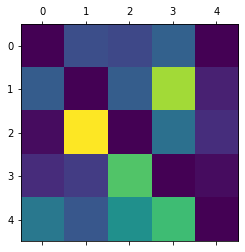

In [32]:
import numpy as np
from sklearn.svm import SVR
# def GC():
all_candidate = [[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4]]
granger_matrix = np.zeros([5, 5])#5*5
var_denominator = np.zeros([1, 5])#1*5
for k in range(5):
    tmp_y = np.reshape(y2[:, k], [y2.shape[0], 1])
    tmp_y=tmp_y.ravel()  
    input_set=all_candidate[k]
    hist_result = []
    x_11=x2[:,:,input_set]
    x_111=np.reshape(x_11,[x_11.shape[0],-1])
    # lr=LR().fit(x_111,tmp_y)
    # lstm = CustomLSTM(num_hidden=30, num_channel=len(input_set))
    # svr_rbf = SVR(kernel='rbf', C=1000,gamma=0.6,max_iter=1e5)
    svr_rbf = SVR(kernel='linear')
    hist_res = svr_rbf.fit(x_111,tmp_y)
    # hist_res = lstm.fit(x1[:, :, input_set], tmp_y, batch_size=64, epochs=100)
    # hist_result.append(hist_res)
    var_denominator[0][k] = np.var(hist_res.predict(x_111) - tmp_y)
    for j in range(5):
        # if j not in input_set:
        #     granger_matrix[j][k] = var_denominator[0][k]
        # elif len(input_set) == 1:
        #     tmp_x = x1[:, :, k]
        #     tmp_x = tmp_x[:, :, np.newaxis]
        #     granger_matrix[j][k] = np.var(svr_rbf.predict(tmp_x) - tmp_y, axis=0)
        # else:
        tmp_x = x2[:, :, input_set]
        channel_del_idx = input_set.index(j)
        tmp_x[:, :, channel_del_idx] = 0
        x_1111=np.reshape(tmp_x,[tmp_x.shape[0],-1])
        lr11=LR().fit(x_1111,tmp_y)
        # svr_rbf1 = SVR(kernel='rbf', C=1000,gamma=0.6,max_iter=1e5)
        svr_rbf1 = SVR(kernel='linear')
        his2=svr_rbf1.fit(x_1111,tmp_y)
        granger_matrix[j][k] = np.var(his2.predict(x_1111) - tmp_y)
granger_matrix = granger_matrix / var_denominator
for i in range(5):
    granger_matrix[i][i] = 1
granger_matrix[granger_matrix < 1] = 1
granger_matrix = np.log(granger_matrix)
    # return granger_matrix

# granger_matrix=np.zeros((5,5))
# for i in range(10):
#     granger_matrix +=GC()
# granger_matrix=granger_matrix/10
# granger_matrix=GC()
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.matshow(granger_matrix)

In [23]:
granger_matrix

array([[0.        , 0.10151155, 0.03937358, 0.        , 0.        ],
       [0.05703707, 0.        , 0.07019488, 0.04622457, 0.05584502],
       [0.08862245, 0.0300685 , 0.        , 0.        , 0.07688733],
       [0.02732457, 0.03006446, 0.07358109, 0.        , 0.01270516],
       [0.04017992, 0.01081519, 0.05771384, 0.        , 0.        ]])

In [10]:
import numpy as np
from sklearn.svm import SVR
# def GC():
all_candidate = [[0,1,2,3,4,5,6,7,8,9,10,11],[0,1,2,3,4,5,6,7,8,9,10,11],[0,1,2,3,4,5,6,7,8,9,10,11],[0,1,2,3,4,5,6,7,8,9,10,11],[0,1,2,3,4,5,6,7,8,9,10,11]]
granger_matrix = np.zeros([5, 5])#5*5
var_denominator = np.zeros([1, 5])#1*5
for k in range(5):
    tmp_y = np.reshape(y1[:, k], [y1.shape[0], 1])
    tmp_y=tmp_y.ravel()    
    input_set=all_candidate[k]
    hist_result = []
    x_11=x1[:,:,input_set]
    x_111=np.reshape(x_11,[x_11.shape[0],-1])
    # lr=LR().fit(x_111,tmp_y)
    # lstm = CustomLSTM(num_hidden=30, num_channel=len(input_set))
    svr_rbf = SVR(kernel='rbf', C=1000,gamma=0.6,max_iter=1e5)# gamma=0.1C=1e3
    hist_res = svr_rbf.fit(x_111,tmp_y)
    # hist_res = lstm.fit(x1[:, :, input_set], tmp_y, batch_size=64, epochs=100)
    # hist_result.append(hist_res)
    var_denominator[0][k] = np.var(hist_res.predict(x_111) - tmp_y)
    for j in range(5):
        # if j not in input_set:
        #     granger_matrix[j][k] = var_denominator[0][k]
        # elif len(input_set) == 1:
        #     tmp_x = x1[:, :, k]
        #     tmp_x = tmp_x[:, :, np.newaxis]
        #     granger_matrix[j][k] = np.var(svr_rbf.predict(tmp_x) - tmp_y, axis=0)
        # else:
        tmp_x = x1[:, :, input_set]
        channel_del_idx = input_set.index(j)
        tmp_x[:, :, channel_del_idx] = 0
        x_1111=np.reshape(tmp_x,[tmp_x.shape[0],-1])
        # lr11=LR().fit(x_1111,tmp_y)
        svr_rbf1 = SVR(kernel='rbf', C=1000,gamma=0.6,max_iter=1e5)
        his2=svr_rbf1.fit(x_1111,tmp_y)
        granger_matrix[j][k] = np.var(his2.predict(x_1111) - tmp_y)
granger_matrix = granger_matrix / var_denominator
for i in range(5):
    granger_matrix[i][i] = 1
granger_matrix[granger_matrix < 1] = 1
granger_matrix = np.log(granger_matrix)
    # return granger_matrix

# granger_matrix=np.zeros((5,5))
# for i in range(10):
#     granger_matrix +=GC()
# granger_matrix=granger_matrix/10
# granger_matrix=GC()
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.matshow(granger_matrix)

NameError: name 'x1' is not defined

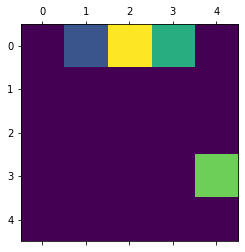

In [16]:
import numpy as np
from sklearn.svm import SVR
# def GC():
all_candidate = [[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4]]
granger_matrix = np.zeros([5, 5])#5*5
var_denominator = np.zeros([1, 5])#1*5
for k in range(5):
    tmp_y = np.reshape(y1[:, k], [y1.shape[0], 1])
    tmp_y=tmp_y.ravel()    
    input_set=all_candidate[k]
    hist_result = []
    x_11=x1[:,:,input_set]
    x_111=np.reshape(x_11,[x_11.shape[0],-1])
    svr_rbf = SVR(kernel='rbf', C=1000,gamma=0.6,max_iter=1e5)# gamma=0.1C=1e3
    hist_res = svr_rbf.fit(x_111,tmp_y)
    var_denominator[0][k] = np.var(hist_res.predict(x_111) - tmp_y)
    for j in range(5):
        tmp_x = x1[:, :, input_set]
        channel_del_idx = input_set.index(j)
        tmp_x[:, :, channel_del_idx] = 0
        x_1111=np.reshape(tmp_x,[tmp_x.shape[0],-1])
        svr_rbf1 = SVR(kernel='rbf', C=1000,gamma=0.6,max_iter=1e5)
        his2=svr_rbf1.fit(x_1111,tmp_y)
        granger_matrix[j][k] = np.var(his2.predict(x_1111) - tmp_y)
granger_matrix = granger_matrix / var_denominator
for i in range(5):
    granger_matrix[i][i] = 1
granger_matrix[granger_matrix < 1] = 1
granger_matrix = np.log(granger_matrix)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.matshow(granger_matrix)

In [17]:
granger_matrix

array([[0.        , 0.04208143, 0.15984187, 0.09973157, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.12482506],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

第0次梯度下降损失为: 158.94
第1次梯度下降损失为: 158.3
第2次梯度下降损失为: 157.66
第3次梯度下降损失为: 157.03
第4次梯度下降损失为: 156.41
第5次梯度下降损失为: 155.78
第6次梯度下降损失为: 155.16
第7次梯度下降损失为: 154.54
第8次梯度下降损失为: 153.92
第9次梯度下降损失为: 153.31
第10次梯度下降损失为: 152.7
第11次梯度下降损失为: 152.09
第12次梯度下降损失为: 151.48
第13次梯度下降损失为: 150.88
第14次梯度下降损失为: 150.28
第15次梯度下降损失为: 149.68
第16次梯度下降损失为: 149.08
第17次梯度下降损失为: 148.49
第18次梯度下降损失为: 147.9
第19次梯度下降损失为: 147.31
第20次梯度下降损失为: 146.72
第21次梯度下降损失为: 146.14
第22次梯度下降损失为: 145.56
第23次梯度下降损失为: 144.98
第24次梯度下降损失为: 144.4
第25次梯度下降损失为: 143.83
第26次梯度下降损失为: 143.26
第27次梯度下降损失为: 142.69
第28次梯度下降损失为: 142.12
第29次梯度下降损失为: 141.56
第30次梯度下降损失为: 141.0
第31次梯度下降损失为: 140.44
第32次梯度下降损失为: 139.88
第33次梯度下降损失为: 139.32
第34次梯度下降损失为: 138.77
第35次梯度下降损失为: 138.22
第36次梯度下降损失为: 137.67
第37次梯度下降损失为: 137.13
第38次梯度下降损失为: 136.58
第39次梯度下降损失为: 136.04
第40次梯度下降损失为: 135.5
第41次梯度下降损失为: 134.97
第42次梯度下降损失为: 134.43
第43次梯度下降损失为: 133.9
第44次梯度下降损失为: 133.37
第45次梯度下降损失为: 132.84
第46次梯度下降损失为: 132.32
第47次梯度下降损失为: 131.79
第48次梯度下降损失为: 131.27
第49次梯度下降损失为: 130.75
第50次梯度下降损失为: 130.

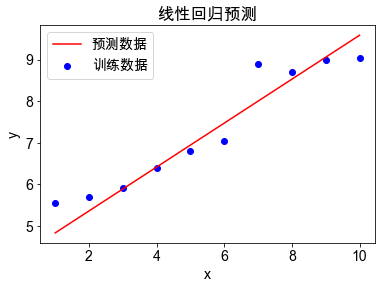

In [25]:
# 线性回归 + Python + 梯度下降法

import numpy as np
import matplotlib.pyplot as plt

x = np.array([[1, 5.56], [2, 5.70], [3, 5.91], [4, 6.40],[5, 6.80],
              [6, 7.05], [7, 8.90], [8, 8.70],[9, 9.00], [10, 9.05]])
m, n = np.shape(x)
x_data = np.ones((m, n))
x_data[:, :-1] = x[:, :-1]
y_data = x[:, -1]
m, n = np.shape(x_data)
theta = np.ones(n)

def gradientDescent(iter, x, y, w, alpha):
    x_train = x.transpose()
    for i in range(0, iter):
        pre = np.dot(x, w)
        loss = (pre - y)
        gradient = np.dot(x_train, loss) / m
        w = w - alpha * gradient
        cost = 1.0 / 2 * m * np.sum(np.square(np.dot(x, np.transpose(w)) - y))
        print("第{}次梯度下降损失为: {}".format(i,round(cost,2)))
    return w


result = gradientDescent(1000, x_data, y_data, theta, 0.01)
y_pre = np.dot(x_data, result)
print("线性回归模型 w: ", result)

plt.rc('font', family='Arial Unicode MS', size=14)
plt.scatter(x[:, 0], x[:, 1], color='b', label='训练数据')
plt.plot(x[:, 0], y_pre, color='r', label='预测数据')
plt.xlabel('x')
plt.ylabel('y')
plt.title('线性回归预测')
plt.legend()
plt.show()

In [2]:
import struct
import numpy as np
def load_mnist(path,  kind):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,'%s-labels.idx1-ubyte' % kind)#路径拼接
    images_path = os.path.join(path,'%s-images.idx3-ubyte' % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))#解压方式（端模式+字长）
        labels = np.fromfile(lbpath,dtype=np.uint8)#按照
        
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols =struct.unpack(">IIII",imgpath.read(16))
        images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels), 784)
 
    return images, labels

X_train, y_train = load_mnist('E:\mnist\mnistCSV', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

X_test, y_test = load_mnist('E:\mnist\mnistCSV', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 60000, columns: 784
Rows: 10000, columns: 784


In [3]:
import numpy as np
from scipy.special import expit

class NeuralNetMLP(object):
    """ Feedforward neural network / Multi-layer perceptron classifier.

    Parameters
    ------------
    n_output : int
        Number of output units, should be equal to the
        number of unique class labels.
    n_features : int
        Number of features (dimensions) in the target dataset.
        Should be equal to the number of columns in the X array.
    n_hidden : int (default: 30)
        Number of hidden units.
    l1 : float (default: 0.0)
        Lambda value for L1-regularization.
        No regularization if l1=0.0 (default)
    l2 : float (default: 0.0)
        Lambda value for L2-regularization.
        No regularization if l2=0.0 (default)
    epochs : int (default: 500)
        Number of passes over the training set.
    eta : float (default: 0.001)
        Learning rate.
    alpha : float (default: 0.0)
        Momentum constant. Factor multiplied with the
        gradient of the previous epoch t-1 to improve
        learning speed
        w(t) := w(t) - (grad(t) + alpha*grad(t-1))
    decrease_const : float (default: 0.0)
        Decrease constant. Shrinks the learning rate
        after each epoch via eta / (1 + epoch*decrease_const)
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent circles.
    minibatches : int (default: 1)
        Divides training data into k minibatches for efficiency.
        Normal gradient descent learning if k=1 (default).
    random_state : int (default: None)
        Set random state for shuffling and initializing the weights.

    Attributes
    -----------
    cost_ : list
      Sum of squared errors after each epoch.

    """
    def __init__(self, n_output, n_features, n_hidden=30,
                 l1=0.0, l2=0.0, epochs=500, eta=0.001,
                 alpha=0.0, decrease_const=0.0, shuffle=True,
                 minibatches=1, random_state=None):

        np.random.seed(random_state)
        self.n_output = n_output
        self.n_features = n_features
        self.n_hidden = n_hidden
        self.w1, self.w2 = self._initialize_weights()
        self.l1 = l1
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches

    def _encode_labels(self, y, k):
        """Encode labels into one-hot representation

        Parameters
        ------------
        y : array, shape = [n_samples]
            Target values.

        Returns
        -----------
        onehot : array, shape = (n_labels, n_samples)

        """
        onehot = np.zeros((k, y.shape[0]))
        for idx, val in enumerate(y):
            onehot[val, idx] = 1.0
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        w1 = np.random.uniform(-1.0, 1.0,
                               size=self.n_hidden*(self.n_features + 1))
        w1 = w1.reshape(self.n_hidden, self.n_features + 1)
        w2 = np.random.uniform(-1.0, 1.0,
                               size=self.n_output*(self.n_hidden + 1))
        w2 = w2.reshape(self.n_output, self.n_hidden + 1)
        return w1, w2

    def _sigmoid(self, z):
        """Compute logistic function (sigmoid)

        Uses scipy.special.expit to avoid overflow
        error for very small input values z.

        """
        # return 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    def _sigmoid_gradient(self, z):
        """Compute gradient of the logistic function"""
        sg = self._sigmoid(z)
        return sg * (1.0 - sg)

    def _add_bias_unit(self, X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            X_new = np.ones((X.shape[0], X.shape[1] + 1))
            X_new[:, 1:] = X
        elif how == 'row':
            X_new = np.ones((X.shape[0] + 1, X.shape[1]))
            X_new[1:, :] = X
        else:
            raise AttributeError('`how` must be `column` or `row`')
        return X_new

    def _feedforward(self, X, w1, w2):
        """Compute feedforward step

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
            Input layer with original features.
        w1 : array, shape = [n_hidden_units, n_features]
            Weight matrix for input layer -> hidden layer.
        w2 : array, shape = [n_output_units, n_hidden_units]
            Weight matrix for hidden layer -> output layer.

        Returns
        ----------
        a1 : array, shape = [n_samples, n_features+1]
            Input values with bias unit.
        z2 : array, shape = [n_hidden, n_samples]
            Net input of hidden layer.
        a2 : array, shape = [n_hidden+1, n_samples]
            Activation of hidden layer.
        z3 : array, shape = [n_output_units, n_samples]
            Net input of output layer.
        a3 : array, shape = [n_output_units, n_samples]
            Activation of output layer.

        """
        a1 = self._add_bias_unit(X, how='column')
        z2 = w1.dot(a1.T)
        a2 = self._sigmoid(z2)
        a2 = self._add_bias_unit(a2, how='row')
        z3 = w2.dot(a2)
        a3 = self._sigmoid(z3)
        return a1, z2, a2, z3, a3

    def _L2_reg(self, lambda_, w1, w2):
        """Compute L2-regularization cost"""
        return (lambda_/2.0) * (np.sum(w1[:, 1:] ** 2) +
                                np.sum(w2[:, 1:] ** 2))

    def _L1_reg(self, lambda_, w1, w2):
        """Compute L1-regularization cost"""
        return (lambda_/2.0) * (np.abs(w1[:, 1:]).sum() +
                                np.abs(w2[:, 1:]).sum())

    def _get_cost(self, y_enc, output, w1, w2):
        """Compute cost function.

        Parameters
        ----------
        y_enc : array, shape = (n_labels, n_samples)
            one-hot encoded class labels.
        output : array, shape = [n_output_units, n_samples]
            Activation of the output layer (feedforward)
        w1 : array, shape = [n_hidden_units, n_features]
            Weight matrix for input layer -> hidden layer.
        w2 : array, shape = [n_output_units, n_hidden_units]
            Weight matrix for hidden layer -> output layer.

        Returns
        ---------
        cost : float
            Regularized cost.

        """
        term1 = -y_enc * (np.log(output))
        term2 = (1.0 - y_enc) * np.log(1.0 - output)
        cost = np.sum(term1 - term2)
        L1_term = self._L1_reg(self.l1, w1, w2)
        L2_term = self._L2_reg(self.l2, w1, w2)
        cost = cost + L1_term + L2_term
        return cost

    def _get_gradient(self, a1, a2, a3, z2, y_enc, w1, w2):
        """ Compute gradient step using backpropagation.

        Parameters
        ------------
        a1 : array, shape = [n_samples, n_features+1]
            Input values with bias unit.
        a2 : array, shape = [n_hidden+1, n_samples]
            Activation of hidden layer.
        a3 : array, shape = [n_output_units, n_samples]
            Activation of output layer.
        z2 : array, shape = [n_hidden, n_samples]
            Net input of hidden layer.
        y_enc : array, shape = (n_labels, n_samples)
            one-hot encoded class labels.
        w1 : array, shape = [n_hidden_units, n_features]
            Weight matrix for input layer -> hidden layer.
        w2 : array, shape = [n_output_units, n_hidden_units]
            Weight matrix for hidden layer -> output layer.

        Returns
        ---------
        grad1 : array, shape = [n_hidden_units, n_features]
            Gradient of the weight matrix w1.
        grad2 : array, shape = [n_output_units, n_hidden_units]
            Gradient of the weight matrix w2.

        """
        # backpropagation
        sigma3 = a3 - y_enc
        z2 = self._add_bias_unit(z2, how='row')
        sigma2 = w2.T.dot(sigma3) * self._sigmoid_gradient(z2)
        sigma2 = sigma2[1:, :]
        grad1 = sigma2.dot(a1)
        grad2 = sigma3.dot(a2.T)

        # regularize
        grad1[:, 1:] += (w1[:, 1:] * (self.l1 + self.l2))
        grad2[:, 1:] += (w2[:, 1:] * (self.l1 + self.l2))

        return grad1, grad2

    def predict(self, X):
        """Predict class labels

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
            Input layer with original features.

        Returns:
        ----------
        y_pred : array, shape = [n_samples]
            Predicted class labels.

        """
        if len(X.shape) != 2:
            raise AttributeError('X must be a [n_samples, n_features] array.\n'
                                 'Use X[:,None] for 1-feature classification,'
                                 '\nor X[[i]] for 1-sample classification')

        a1, z2, a2, z3, a3 = self._feedforward(X, self.w1, self.w2)
        y_pred = np.argmax(z3, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data.

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
            Input layer with original features.
        y : array, shape = [n_samples]
            Target class labels.
        print_progress : bool (default: False)
            Prints progress as the number of epochs
            to stderr.

        Returns:
        ----------
        self

        """
        self.cost_ = []
        X_data, y_data = X.copy(), y.copy()
        y_enc = self._encode_labels(y, self.n_output)

        delta_w1_prev = np.zeros(self.w1.shape)
        delta_w2_prev = np.zeros(self.w2.shape)

        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx = np.random.permutation(y_data.shape[0])
                X_data, y_enc = X_data[idx], y_enc[:, idx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            for idx in mini:

                # feedforward
                a1, z2, a2, z3, a3 = self._feedforward(X_data[idx],
                                                       self.w1,
                                                       self.w2)
                cost = self._get_cost(y_enc=y_enc[:, idx],
                                      output=a3,
                                      w1=self.w1,
                                      w2=self.w2)
                self.cost_.append(cost)

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(a1=a1, a2=a2,
                                                  a3=a3, z2=z2,
                                                  y_enc=y_enc[:, idx],
                                                  w1=self.w1,
                                                  w2=self.w2)

                delta_w1, delta_w2 = self.eta * grad1, self.eta * grad2
                self.w1 -= (delta_w1 + (self.alpha * delta_w1_prev))
                self.w2 -= (delta_w2 + (self.alpha * delta_w2_prev))
                delta_w1_prev, delta_w2_prev = delta_w1, delta_w2

        return self

In [4]:
nn = NeuralNetMLP(n_output=10, 
                  n_features=X_train.shape[1], 
                  n_hidden=50, 
                  l2=0.1, 
                  l1=0.0, 
                  epochs=100, 
                  eta=0.001,
                  alpha=0.001,
                  decrease_const=0.00001,
                  minibatches=50, 
                  shuffle=True,
                  random_state=1)    
    
nn.fit(X_train, y_train, print_progress=True)
y_train_pred = nn.predict(X_train)

acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]

print('Training accuracy: %.2f%%' % (acc * 100))

y_test_pred = nn.predict(X_test)

acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]

print('Test accuracy: %.2f%%' % (acc * 100))

Epoch: 100/100

Training accuracy: 92.11%
Test accuracy: 92.32%


In [5]:
from PIL import Image
img=X_train[y_train==8][0].reshape(28,28)
image=Image.fromarray(img)
image.show()

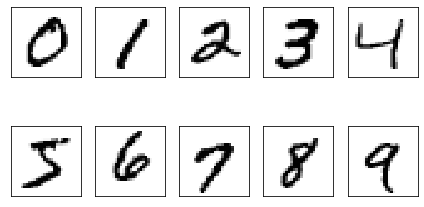

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten() #数组展开 方便进行循环
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_all.png', dpi=300)
plt.show()

In [8]:
import cv2
a= cv2.imread(r'C:\Users\HWW\Desktop\a.jpg',0)
d,b= cv2.threshold(a,125,255,cv2.THRESH_BINARY)
h = cv2.resize(a,(28,28))
cv2.imwrite('c.jpg',h)
import matplotlib.image
img_matrix = matplotlib.image.imread('c.jpg')
t=(255-img_matrix).flatten()
D = t.reshape(1,784)
nn.predict(D)

array([8], dtype=int64)

In [ ]:
def encode(y):
    onehot = np.zeros((10, y.shape[0]))
    for idx, val in enumerate(y):
        onehot[val, idx] = 1.0
    return onehot

<AxesSubplot:xlabel='Time', ylabel='$\\sin(\\theta)$'>

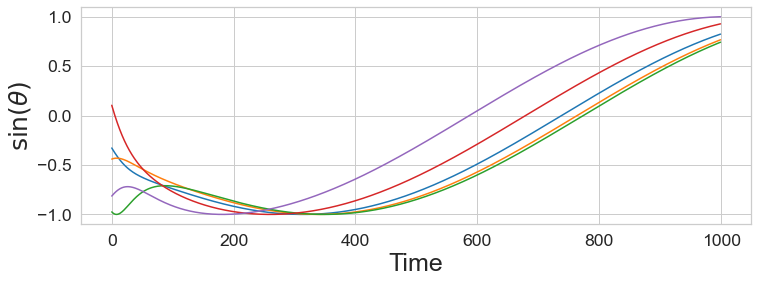

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

from kuramoto import Kuramoto, plot_phase_coherence, plot_activity

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.6)

# Instantiate a random graph and transform into an adjacency matrix
# graph_nx = nx.erdos_renyi_graph(n=10, p=1) # p=1 -> all-to-all connectivity
# graph = nx.to_numpy_array(graph_nx)
graph1=np.array([[0,1,1,1,0],[1,0,0,0,0],[1,0,0,0,0],[1,0,0,0,1],[0,0,0,1,0]])
# Instantiate model with parameters
model = Kuramoto(coupling=3, dt=0.01, T=10, n_nodes=len(graph1))

# Run simulation - output is time series for all nodes (node vs time)
act_mat = model.run(adj_mat=graph1)

# Plot all the time series
plot_activity(act_mat)

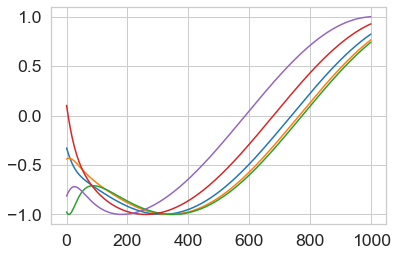

In [110]:
plt.plot(np.sin(act_mat[0]))
plt.plot(np.sin(act_mat[1]))
plt.plot(np.sin(act_mat[2]))
plt.plot(np.sin(act_mat[3]))
plt.plot(np.sin(act_mat[4]))

In [90]:
graph1=np.array([[0,1,1,1,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,1],[0,0,0,1,0]])
graph1

array([[0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]])

In [105]:
act_mat

array([[3.4762305 , 3.48690179, 3.49747758, ..., 7.24321715, 7.24692642,
        7.2506357 ],
       [3.59767419, 3.59509676, 3.59290764, ..., 7.14825384, 7.1519631 ,
        7.15567236],
       [4.93859899, 4.9085771 , 4.87873603, ..., 7.11123673, 7.11494599,
        7.11865525],
       [3.0378938 , 3.0590618 , 3.07983165, ..., 7.46240601, 7.46611531,
        7.46982461],
       [4.09282214, 4.08074584, 4.06918322, ..., 7.80486816, 7.80857748,
        7.8122868 ]])

In [97]:
x3,y3=load_sequence_data1()

In [96]:
# class RNN_GC(object):
#     def __init__(self, opt, num_hidden, mode):#(opt,30,linear)
#         self.sequence_length = opt.sequence_length
#         self.batch_size = opt.batch_size
#         self.num_shift = opt.num_shift
#         self.num_hidden = num_hidden
#         self.num_epoch = opt.num_epoch
#         self.theta = opt.theta
#         self.data_length = opt.data_length
#         self.weight_decay = opt.weight_decay

#         self.mode = mode

def load_sequence_data1():
    # simulation_name = 'realization_' + 'linear' + '_' + '4096' + '.mat'
    # simulation_dir = 'simulation_difflen'
    # simulation_name = os.path.join(simulation_dir, simulation_name)
    # simulation_data = sio.loadmat(simulation_name)#5,4096
    simulation_data = np.array(act_mat).transpose()#4096,5
    num_channel = simulation_data.shape[1]#5
    scaler = preprocessing.StandardScaler().fit(simulation_data)
    simulation_data = scaler.transform(simulation_data)
    min_max_scaler = preprocessing.MinMaxScaler()
    # scale data to [0. 1]
    data = min_max_scaler.fit_transform(simulation_data)#data.shape(4096,5)

    x, y = batch_sequence(data, num_shift=1,
                                sequence_length=20)
    return x,y
    # return data

In [99]:
y3.shape

(979, 5)

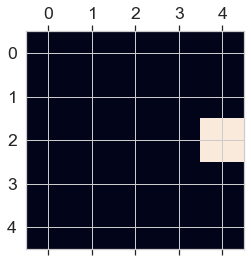

In [101]:
import numpy as np
from sklearn.svm import SVR
# def GC():
all_candidate = [[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4]]
granger_matrix = np.zeros([5, 5])#5*5
var_denominator = np.zeros([1, 5])#1*5
for k in range(5):
    tmp_y = np.reshape(y3[:, k], [y3.shape[0], 1])
    tmp_y=tmp_y.ravel()  
    input_set=all_candidate[k]
    hist_result = []
    x_11=x3[:,:,input_set]
    x_111=np.reshape(x_11,[x_11.shape[0],-1])
    # lr=LR().fit(x_111,tmp_y)
    # lstm = CustomLSTM(num_hidden=30, num_channel=len(input_set))
    svr_rbf = SVR(kernel='rbf', C=1000,gamma=0.6,max_iter=1e5)# gamma=0.1C=1e3
    hist_res = svr_rbf.fit(x_111,tmp_y)
    # hist_res = lstm.fit(x1[:, :, input_set], tmp_y, batch_size=64, epochs=100)
    # hist_result.append(hist_res)
    var_denominator[0][k] = np.var(hist_res.predict(x_111) - tmp_y)
    for j in range(5):
        # if j not in input_set:
        #     granger_matrix[j][k] = var_denominator[0][k]
        # elif len(input_set) == 1:
        #     tmp_x = x1[:, :, k]
        #     tmp_x = tmp_x[:, :, np.newaxis]
        #     granger_matrix[j][k] = np.var(svr_rbf.predict(tmp_x) - tmp_y, axis=0)
        # else:
        tmp_x = x3[:, :, input_set]
        channel_del_idx = input_set.index(j)
        tmp_x[:, :, channel_del_idx] = 0
        x_1111=np.reshape(tmp_x,[tmp_x.shape[0],-1])
        # lr11=LR().fit(x_1111,tmp_y)
        svr_rbf1 = SVR(kernel='rbf', C=1000,gamma=0.6,max_iter=1e5)
        his2=svr_rbf1.fit(x_1111,tmp_y)
        granger_matrix[j][k] = np.var(his2.predict(x_1111) - tmp_y)
granger_matrix = granger_matrix / var_denominator
for i in range(5):
    granger_matrix[i][i] = 1
granger_matrix[granger_matrix < 1] = 1
granger_matrix = np.log(granger_matrix)
    # return granger_matrix

# granger_matrix=np.zeros((5,5))
# for i in range(10):
#     granger_matrix +=GC()
# granger_matrix=granger_matrix/10
# granger_matrix=GC()
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.matshow(granger_matrix)